In [6]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.utils import resample
from imblearn.over_sampling import SMOTE


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans



from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, auc,  recall_score, accuracy_score, precision_score, confusion_matrix,average_precision_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
import shap









# Data Dictionary
1. **Report Number**: Unique identifier for the crash report.
2. **Local Case Number**: Local case identifier for the crash report.
3. **Agency Name**: Name of the agency reporting the crash.
4. **ACRS Report Type**: Type of report generated by the Automated Crash Reporting System.
5. **Crash Date/Time**: Date and time when the crash occurred.
6. **Route Type**: Type of route where the crash occurred (e.g., highway, local road).
7. **Road Name**: Name of the road where the crash occurred.
8. **Cross-Street Type**: Type of the intersecting street.
9. **Cross-Street Name**: Name of the intersecting street.
10. **Off-Road Description**: Description of the location if the crash occurred off-road.
11. **Municipality**: Municipality where the crash occurred.
12. **Related Non-Motorist**: Information about non-motorists involved in the crash.
13. **Collision Type**: Type of collision (e.g., rear-end, head-on).
14. **Weather**: Weather conditions at the time of the crash.
15. **Surface Condition**: Road surface conditions at the time of the crash.
16. **Light**: Lighting conditions at the time of the crash.
17. **Traffic Control**: Type of traffic control at the crash location (e.g., traffic signal, stop sign).
18. **Driver Substance Abuse**: Information about substance abuse by the driver.
19. **Non-Motorist Substance Abuse**: Information about substance abuse by non-motorists involved.
20. **Person ID**: Unique identifier for individuals involved in the crash.
21. **Driver At Fault**: Indicates whether the driver was at fault.
22. **Injury Severity**: Severity of injuries sustained in the crash.
23. **Circumstance**: Circumstances surrounding the crash.
24. **Driver Distracted By**: Factors distracting the driver at the time of the crash.
25. **Drivers License State**: State where the driver's license was issued.
26. **Vehicle ID**: Unique identifier for vehicles involved in the crash.
27. **Vehicle Damage Extent**: Extent of damage to the vehicle.
28. **Vehicle First Impact Location**: Location on the vehicle where the first impact occurred.
29. **Vehicle Second Impact Location**: Location on the vehicle where the second impact occurred (if applicable).
30. **Vehicle Body Type**: Type of vehicle body (e.g., sedan, SUV).
31. **Vehicle Movement**: Movement of the vehicle at the time of the crash.
32. **Vehicle Continuing Dir**: Direction in which the vehicle was continuing after the crash.
33. **Vehicle Going Dir**: Direction in which the vehicle was going at the time of the crash.
34. **Speed Limit**: Posted speed limit at the crash location.
35. **Driverless Vehicle**: Indicates whether the vehicle was driverless (self-driving).
36. **Parked Vehicle**: Indicates whether the vehicle was parked at the time of the crash.
37. **Vehicle Year**: Year of manufacture of the vehicle.
38. **Vehicle Make**: Make or manufacturer of the vehicle.
39. **Vehicle Model**: Model of the vehicle.
40. **Equipment Problems**: Any equipment problems reported for the vehicle.
41. **Latitude**: Latitude coordinates of the crash location.
42. **Longitude**: Longitude coordinates of the crash location.
43. **Location**: Description or address of the crash location.


In [7]:
df=pd.read_csv('/Users/Abdul/Desktop/MMA/Data Mining/Crash_Reporting_-_Drivers_Data.csv',parse_dates=['Crash Date/Time'])
df.sample(10)

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
124085,DD5647001Z,220030518,Rockville Police Departme,Property Damage Crash,2022-07-16 00:52:00,Maryland (State),W JEFFERSON ST,Municipality,GREAT FALLS RD,NaN,...,35,No,No,2015,NISS,4S,NaN,39.083273,-77.156146,"(39.083273, -77.15614583)"
70628,MCP9428000H,15004487,Montgomery County Police,Property Damage Crash,2015-01-28 12:43:00,NaN,NaN,NaN,NaN,"Parking Lot of 1298 E. Gude Drive, Rockville M...",...,15,No,Yes,2010,THOMAS,SCHOOL BUS,NaN,39.098305,-77.136787,"(39.098305, -77.13678667)"
61868,MCP1397000Z,170551025,Montgomery County Police,Injury Crash,2017-12-28 09:55:00,Maryland (State),FREDERICK RD,County,CROGHAN RD,NaN,...,50,No,No,2004,FORD,EXPEDITION,NO MISUSE,39.273386,-77.308860,"(39.27338604, -77.30885983)"
75307,MCP3263001J,210044977,Montgomery County Police,Property Damage Crash,2021-11-06 15:30:00,County,BETHESDA AVE,Maryland (State),WISCONSIN AVE,NaN,...,30,No,No,2009,NISSAN,ROGUE,UNKNOWN,38.980957,-77.092906,"(38.9809572, -77.09290597)"
17606,MCP2785002L,170509318,Montgomery County Police,Property Damage Crash,2017-05-22 22:55:00,Maryland (State),SPENCERVILLE RD,County,LIONS DEN RD,NaN,...,40,No,No,2012,HYUN,SONATA,NO MISUSE,39.108983,-76.946590,"(39.10898333, -76.94659)"
6138,MCP3164002L,190059433,Montgomery County Police,Injury Crash,2019-12-10 06:25:00,County,RANDOLPH RD,County,GARDEN GATE RD,NaN,...,35,No,No,2012,TOYOTA,PRIUS,NO MISUSE,39.063867,-77.039582,"(39.06386667, -77.03958167)"
156572,MCP24750066,210021241,Montgomery County Police,Property Damage Crash,2021-06-04 15:50:00,County,LANARK WAY,County,BRUNETT AVE,NaN,...,30,No,No,2015,CHEV,SUBURBAN,NO MISUSE,39.020307,-77.019677,"(39.02030667, -77.01967667)"
55069,EJ7852001Q,170550965,Gaithersburg Police Depar,Property Damage Crash,2017-12-27 23:00:00,NaN,NaN,NaN,NaN,"15700 SHADY GROVE ROAD, RED LOBSTER PARKING LOT",...,10,No,No,2013,HYUNDAI,SONATA,NaN,39.113575,-77.187040,"(39.113575, -77.18704)"
119534,MCP32150032,220019544,Montgomery County Police,Property Damage Crash,2022-05-08 12:40:00,Maryland (State),16TH ST,Maryland (State),COLESVILLE RD,NaN,...,35,No,No,0,UNKNOWN,UNKNOWN,UNKNOWN,38.992556,-77.036182,"(38.99255596, -77.03618228)"
31585,MCP2600001W,16035908,Montgomery County Police,Property Damage Crash,2016-07-15 16:21:00,NaN,NaN,NaN,NaN,PARKING LOT OF 8427 PINEY BRANCH ROAD,...,15,No,No,2004,HONDA,PILOT,NaN,38.998275,-77.003818,"(38.99827489, -77.00381756)"


In [8]:
df.shape

(166537, 43)

In [9]:
df.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Type',
       'Cross-Street Name', 'Off-Road Description', 'Municipality',
       'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID',
       'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Drivers License State', 'Vehicle ID',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Second Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Equipment Problems', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [10]:
df.isna().sum()

Report Number                          0
Local Case Number                      0
Agency Name                            0
ACRS Report Type                       0
Crash Date/Time                        0
Route Type                         16424
Road Name                          15456
Cross-Street Type                  16455
Cross-Street Name                  15467
Off-Road Description              151083
Municipality                      148079
Related Non-Motorist              161260
Collision Type                       566
Weather                            12946
Surface Condition                  19513
Light                               1380
Traffic Control                    24773
Driver Substance Abuse             30345
Non-Motorist Substance Abuse      162367
Person ID                              0
Driver At Fault                        0
Injury Severity                        0
Circumstance                      136179
Driver Distracted By                   0
Drivers License 

In [11]:
# dropping identifier and location columns 
df.drop(['Report Number', 'Local Case Number', 'Person ID', 'Vehicle ID','Agency Name','Location'],axis=1,inplace=True)

In [12]:
# dropping columns with high number of missing values and columns that contain info that will be known after investigation
cols_to_drop = ['Off-Road Description', 'Municipality', 'Related Non-Motorist', 'Circumstance', 'Non-Motorist Substance Abuse','Driver Substance Abuse','Driver At Fault','Driver Distracted By']


df = df.drop(columns=cols_to_drop)


In [13]:
df.isna().sum()

ACRS Report Type                      0
Crash Date/Time                       0
Route Type                        16424
Road Name                         15456
Cross-Street Type                 16455
Cross-Street Name                 15467
Collision Type                      566
Weather                           12946
Surface Condition                 19513
Light                              1380
Traffic Control                   24773
Injury Severity                       0
Drivers License State              9508
Vehicle Damage Extent               302
Vehicle First Impact Location       156
Vehicle Second Impact Location      256
Vehicle Body Type                  2546
Vehicle Movement                    367
Vehicle Continuing Dir             2585
Vehicle Going Dir                  2585
Speed Limit                           0
Driverless Vehicle                    0
Parked Vehicle                        0
Vehicle Year                          0
Vehicle Make                         23


## Handling Missing Values
- We dropped the following columns because they have too many missing values: 'Off-Road Description', 'Municipality', 'Related Non-Motorist', 'Circumstance', 'Non-Motorist Substance Abuse'
- For the remaining missing values, we dropped the rows with missing values and assessed data loss afterwards; however, we stored the resulting dataframe separately.
- We decided to drop the rows because we have many observations in the dataset
- All Eda was done using the original dataframe, while modelling was done using the cleaned dataframe.


In [14]:
df2=df.dropna()
df2.shape


(93580, 29)

In [15]:
df2['Injury Severity'].value_counts()

Injury Severity
NO APPARENT INJURY          74282
POSSIBLE INJURY             11129
SUSPECTED MINOR INJURY       7299
SUSPECTED SERIOUS INJURY      802
FATAL INJURY                   68
Name: count, dtype: int64

In [16]:
df['Injury Severity'].value_counts()

Injury Severity
NO APPARENT INJURY          136509
POSSIBLE INJURY              16933
SUSPECTED MINOR INJURY       11567
SUSPECTED SERIOUS INJURY      1378
FATAL INJURY                   150
Name: count, dtype: int64

In [17]:
df['ACRS Report Type'].value_counts()

ACRS Report Type
Property Damage Crash    105686
Injury Crash              60436
Fatal Crash                 415
Name: count, dtype: int64

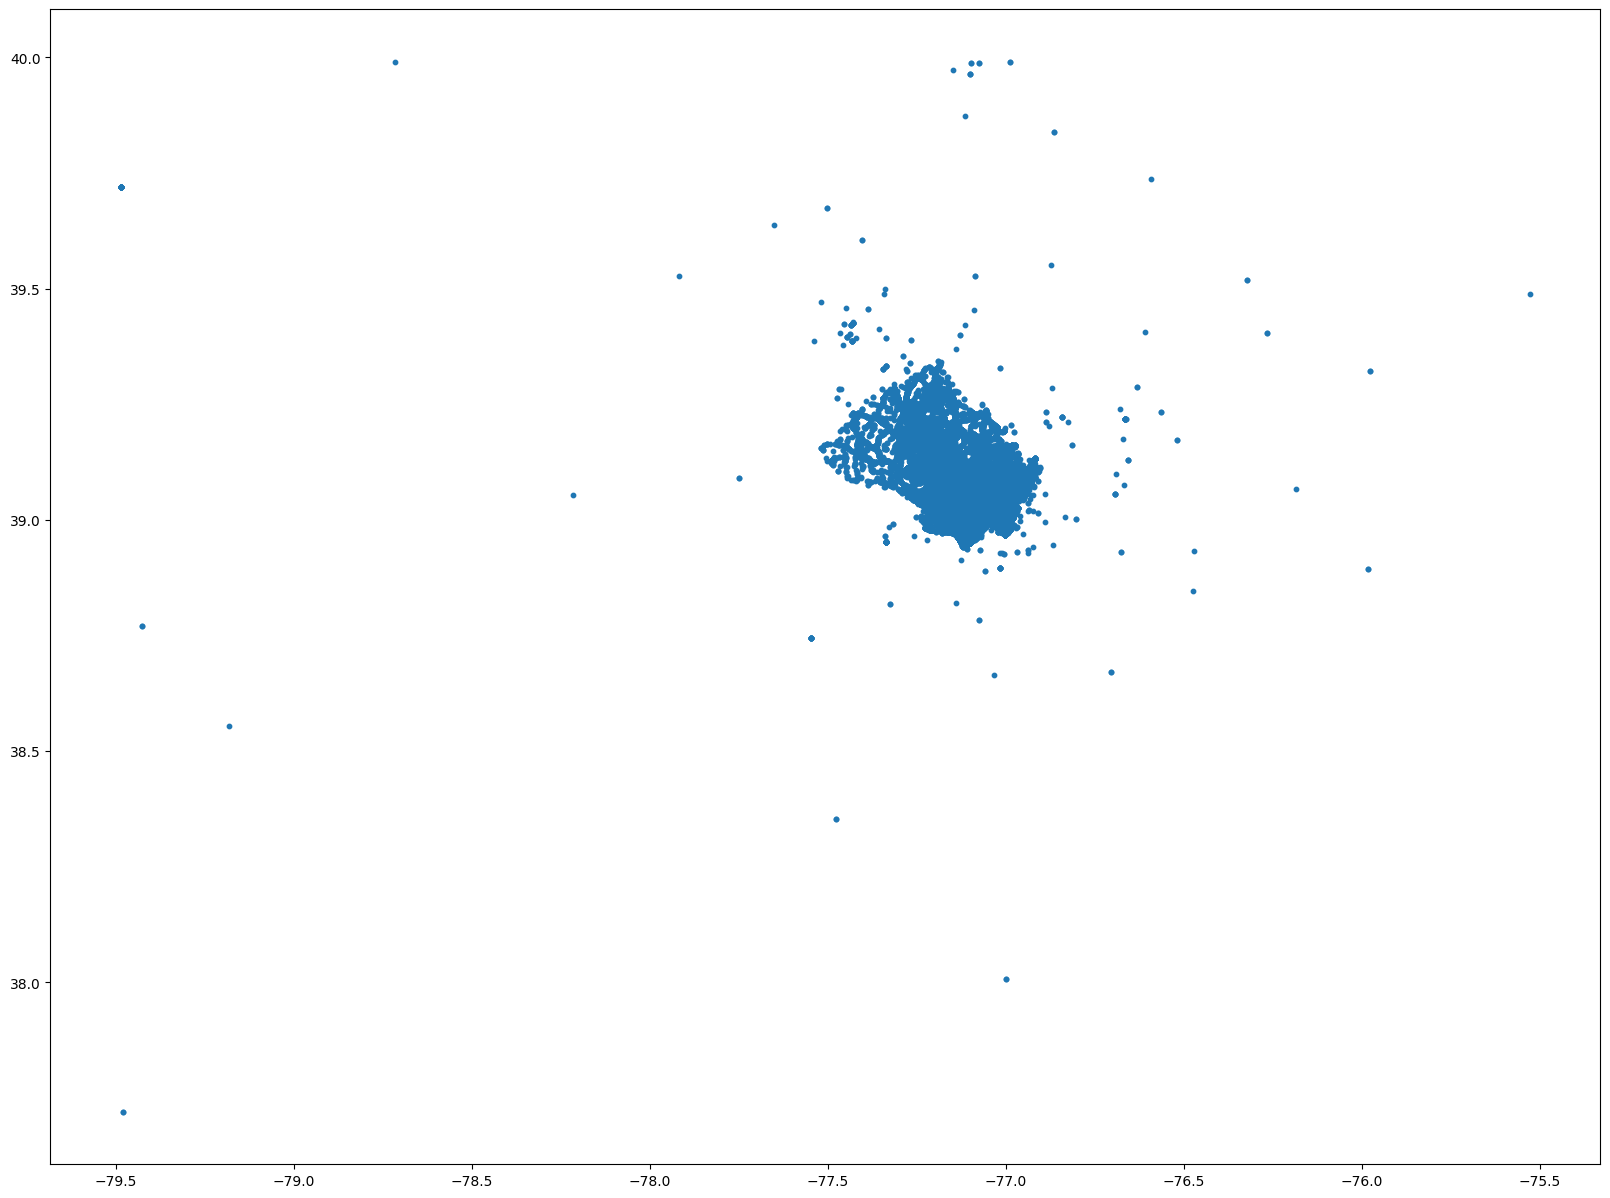

In [18]:
plt.figure(figsize=(20, 15))

plt.scatter (df['Longitude'],
             df['Latitude'],
             s=10);

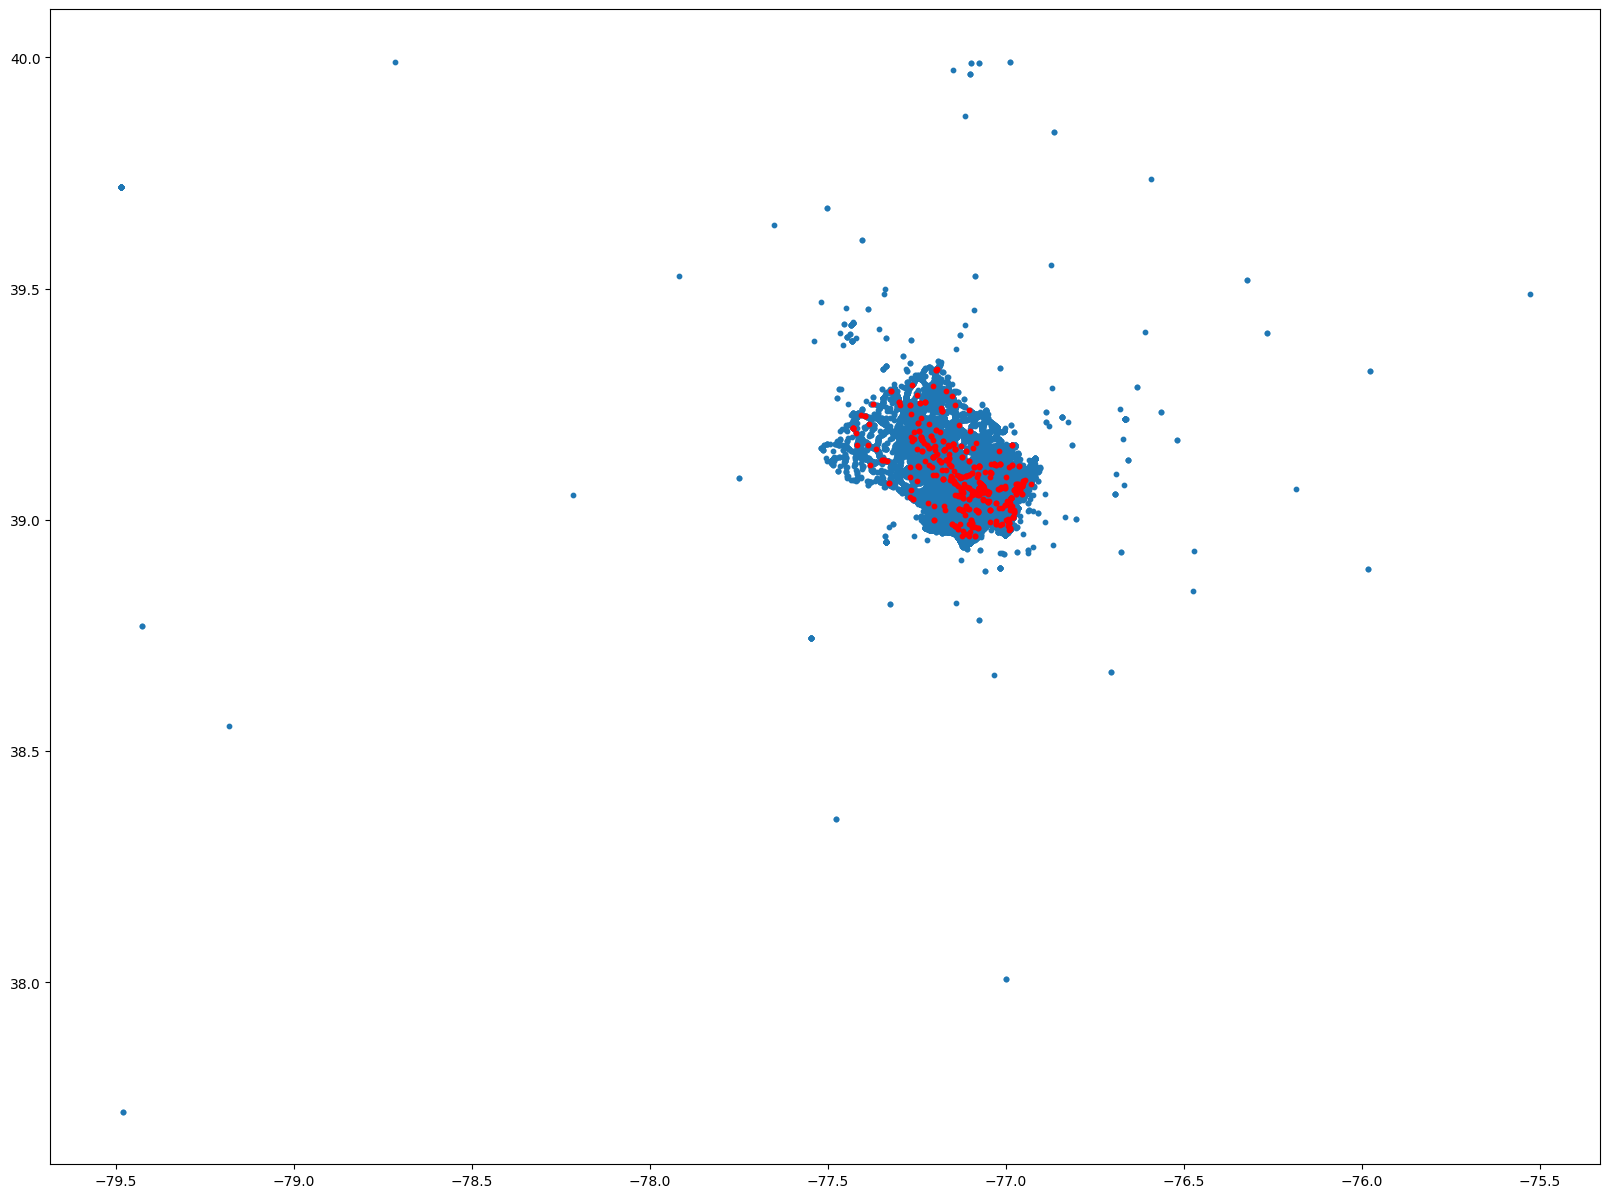

In [19]:
Fatal_Crashes=df[df['ACRS Report Type']=='Fatal Crash']
plt.figure(figsize=(20, 15))

plt.scatter (df['Longitude'],
             df['Latitude'],
             s=10)
plt.scatter (Fatal_Crashes['Longitude'],
                Fatal_Crashes['Latitude'],
                color='red',
                s=10);

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


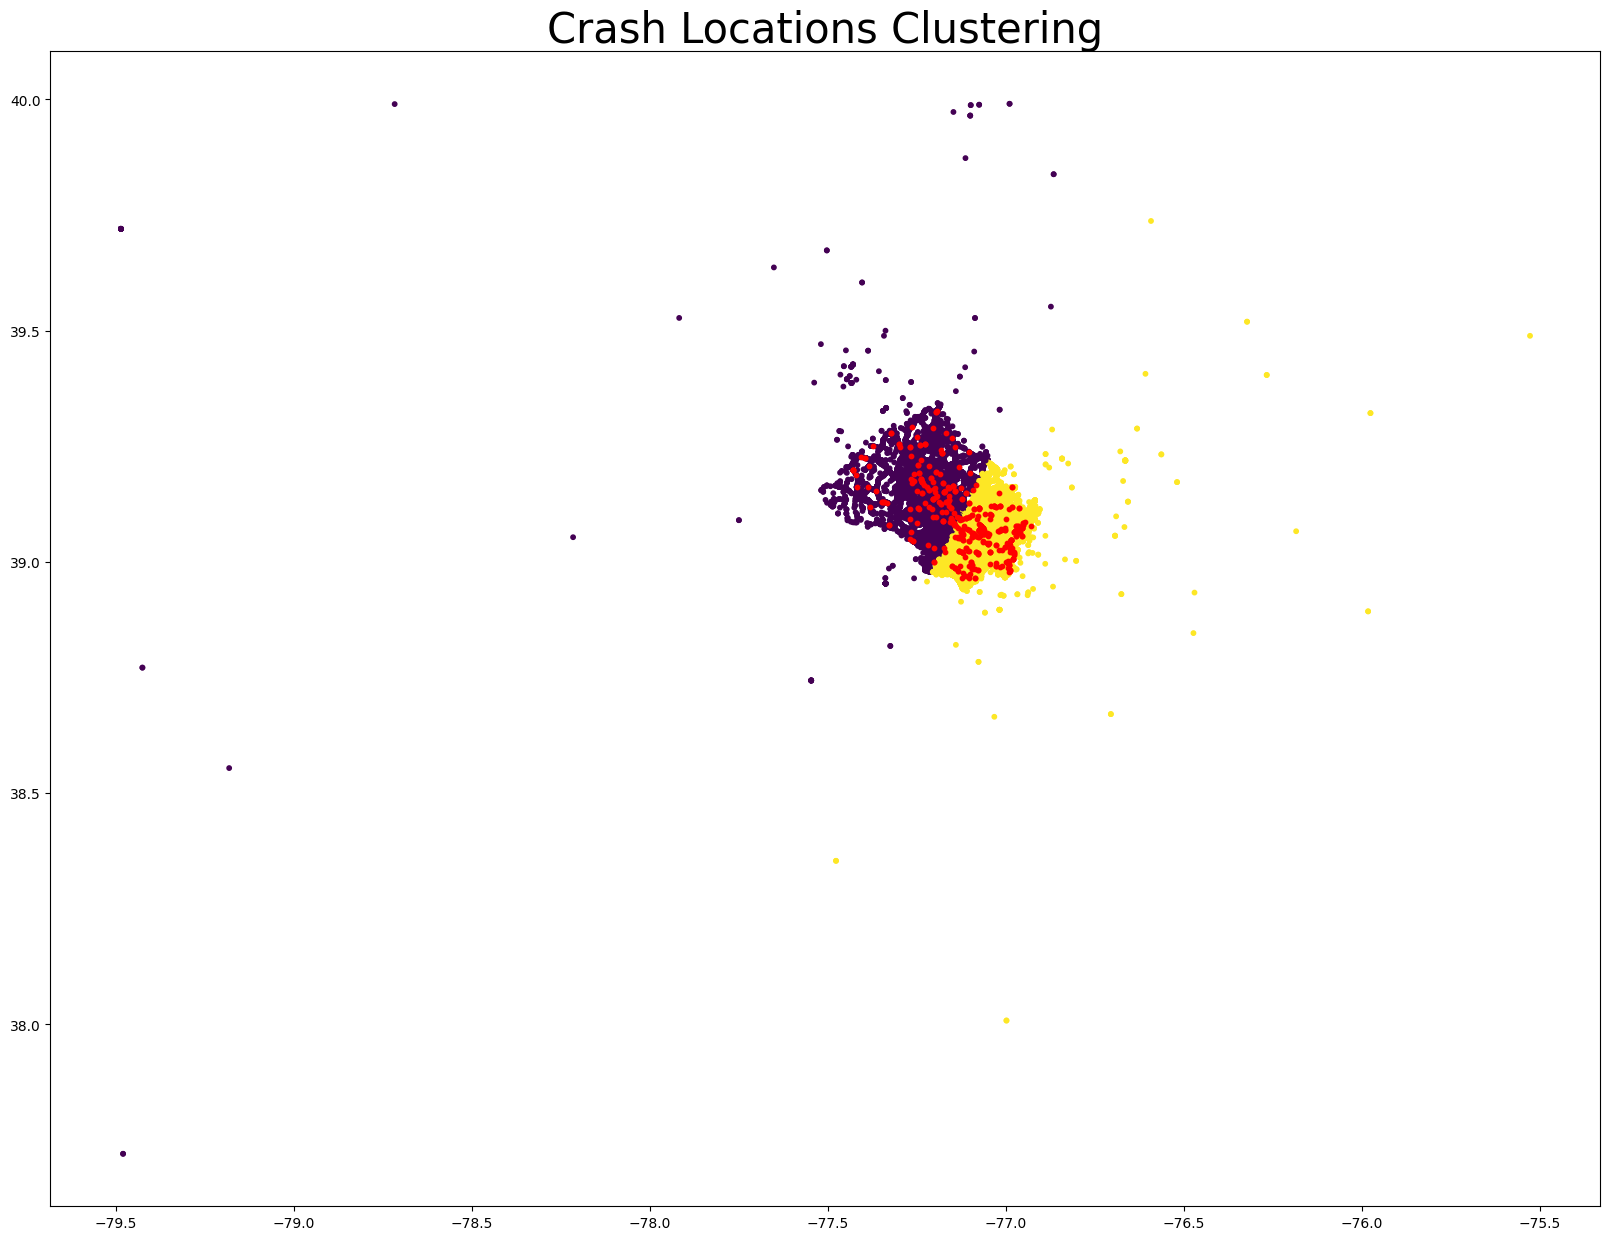

In [20]:
model=KMeans(n_clusters=2)
model.fit(df[['Longitude','Latitude']])
clusters=model.predict(df[['Longitude','Latitude']])
plt.figure(figsize=(20, 15))
plt.scatter(df['Longitude'],df['Latitude'],c=clusters,s=10,cmap='viridis')
plt.title('Crash Locations Clustering',fontsize=30)

plt.scatter (Fatal_Crashes['Longitude'],
                Fatal_Crashes['Latitude'],
                color='red',
                s=10);

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


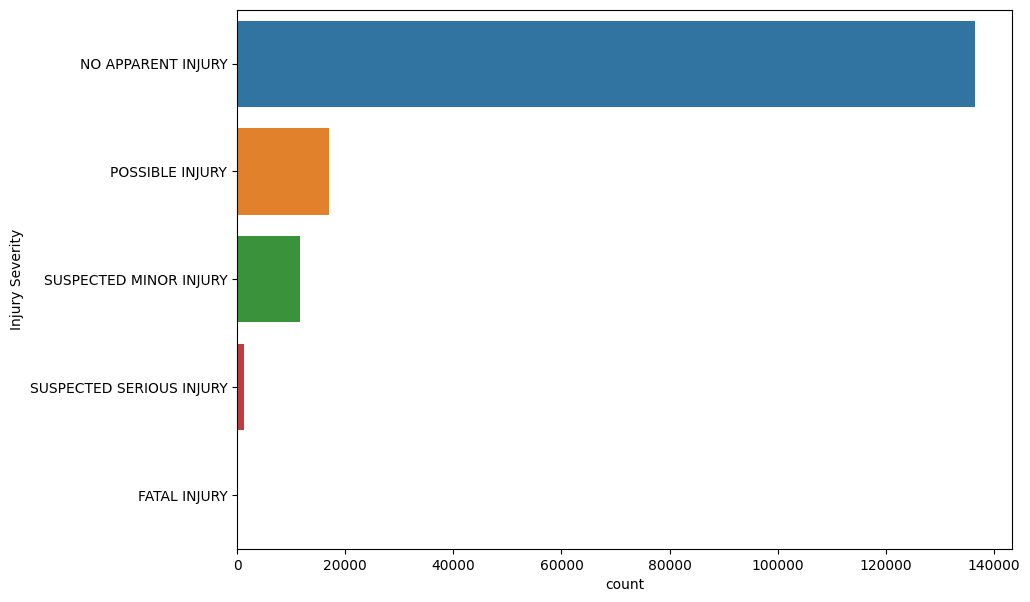

In [21]:
plt.figure(figsize=(10, 7))
sns.countplot(y='Injury Severity',data=df,order=df['Injury Severity'].value_counts().index);

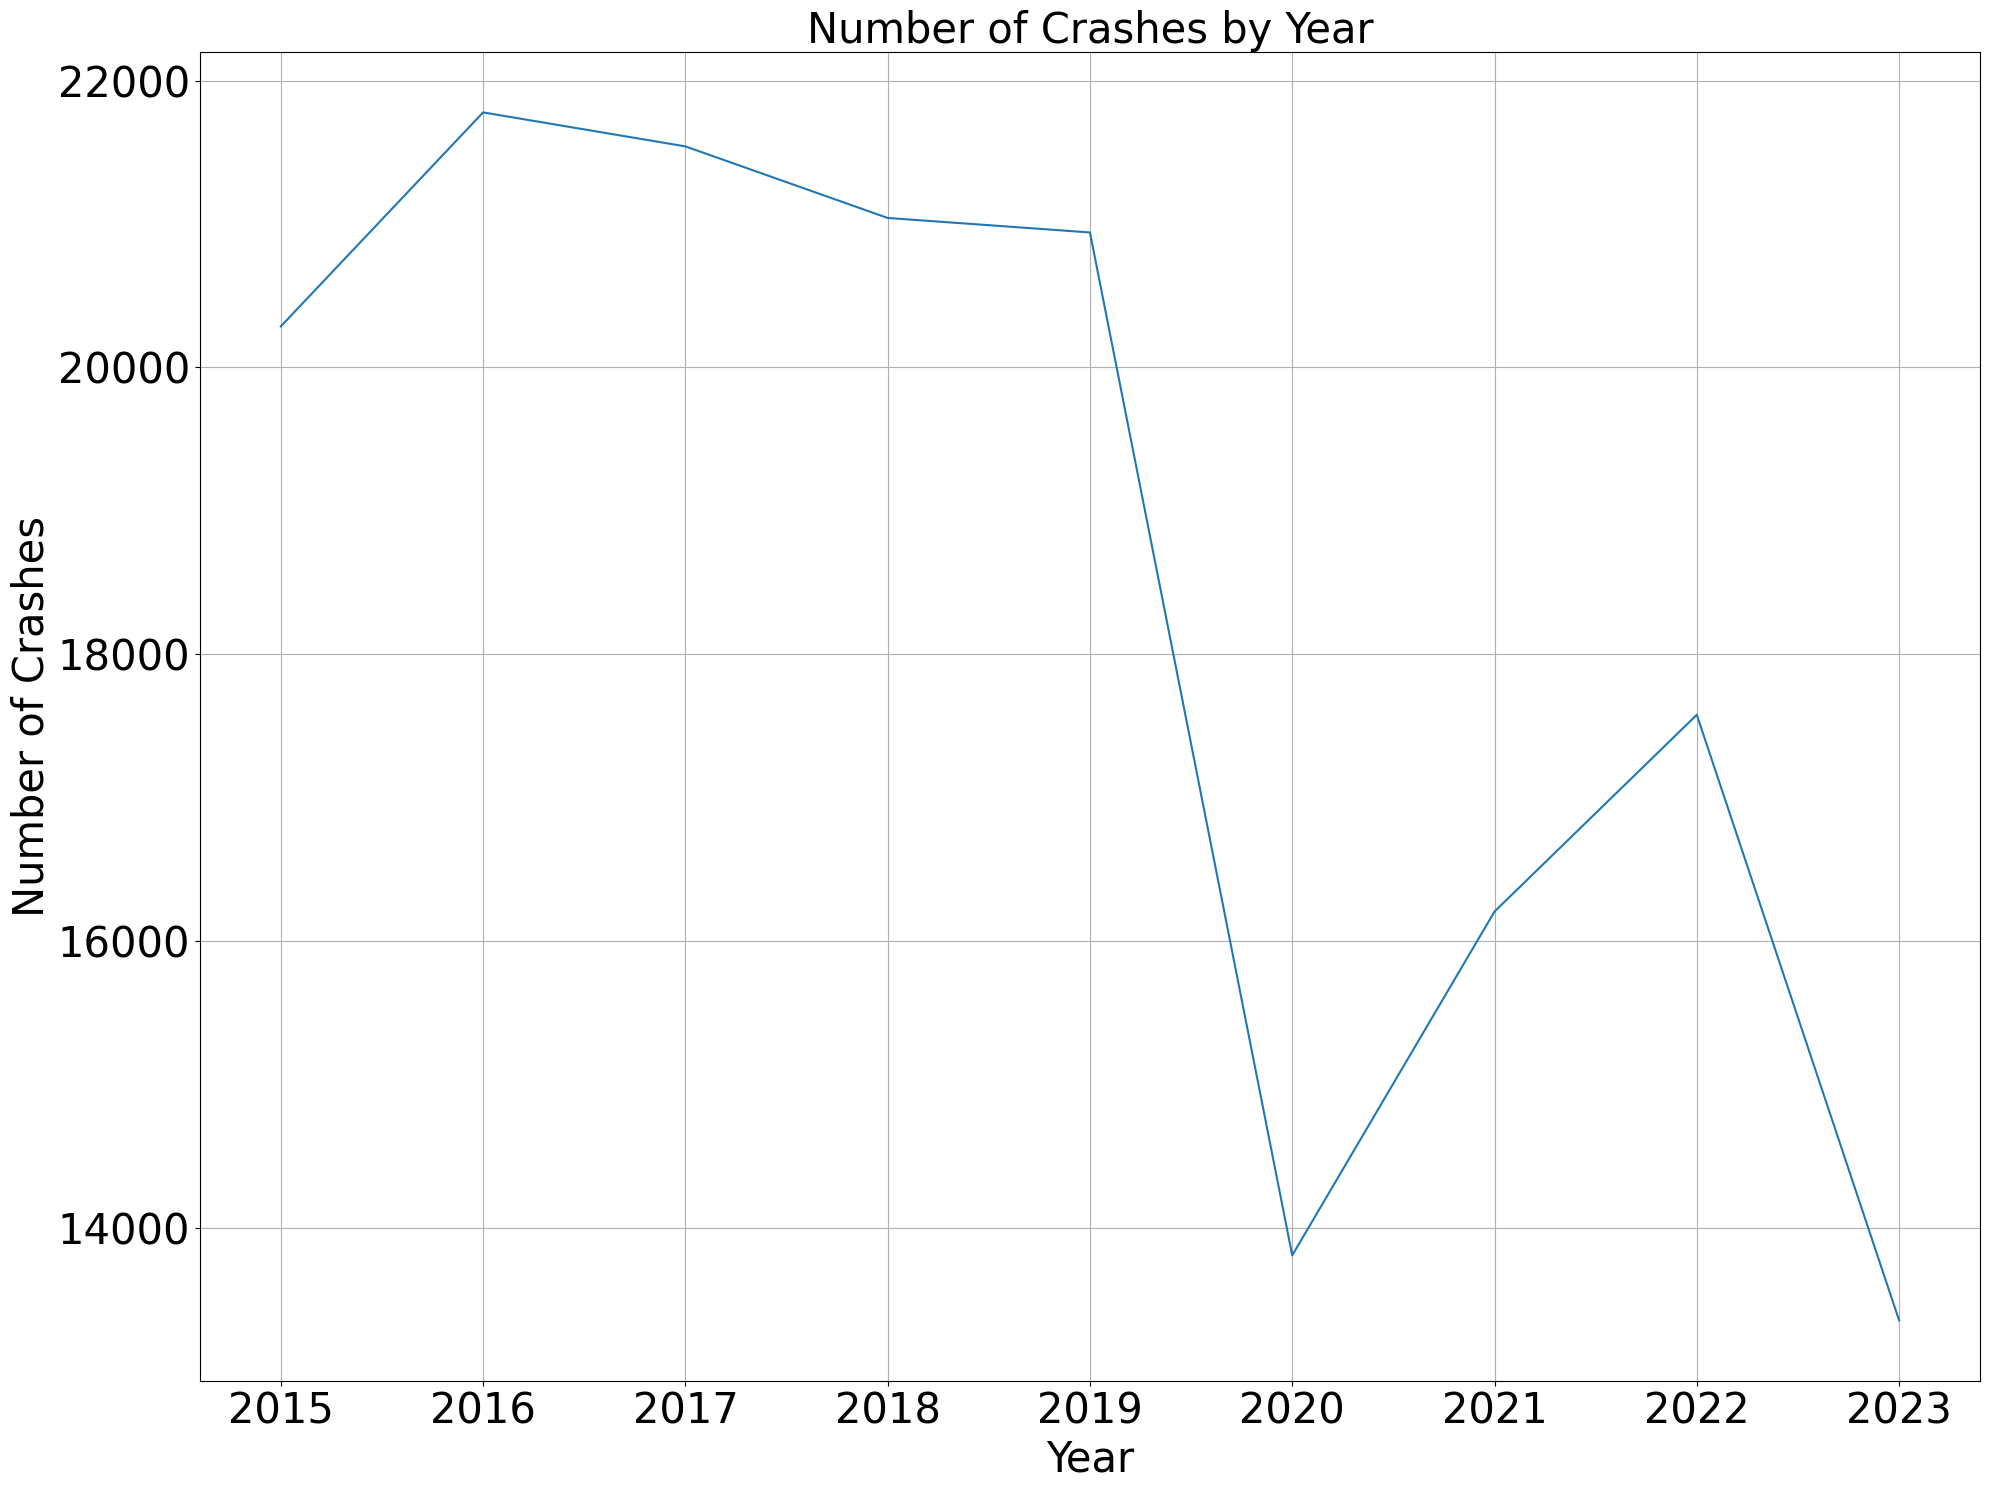

In [22]:
df['Crash Date/Time'].dt.year.value_counts().sort_index().plot(kind='line',figsize=(20, 15))
plt.title('Number of Crashes by Year',fontsize=30)
plt.xlabel('Year',fontsize=30)
plt.ylabel('Number of Crashes',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True)
plt.tight_layout();

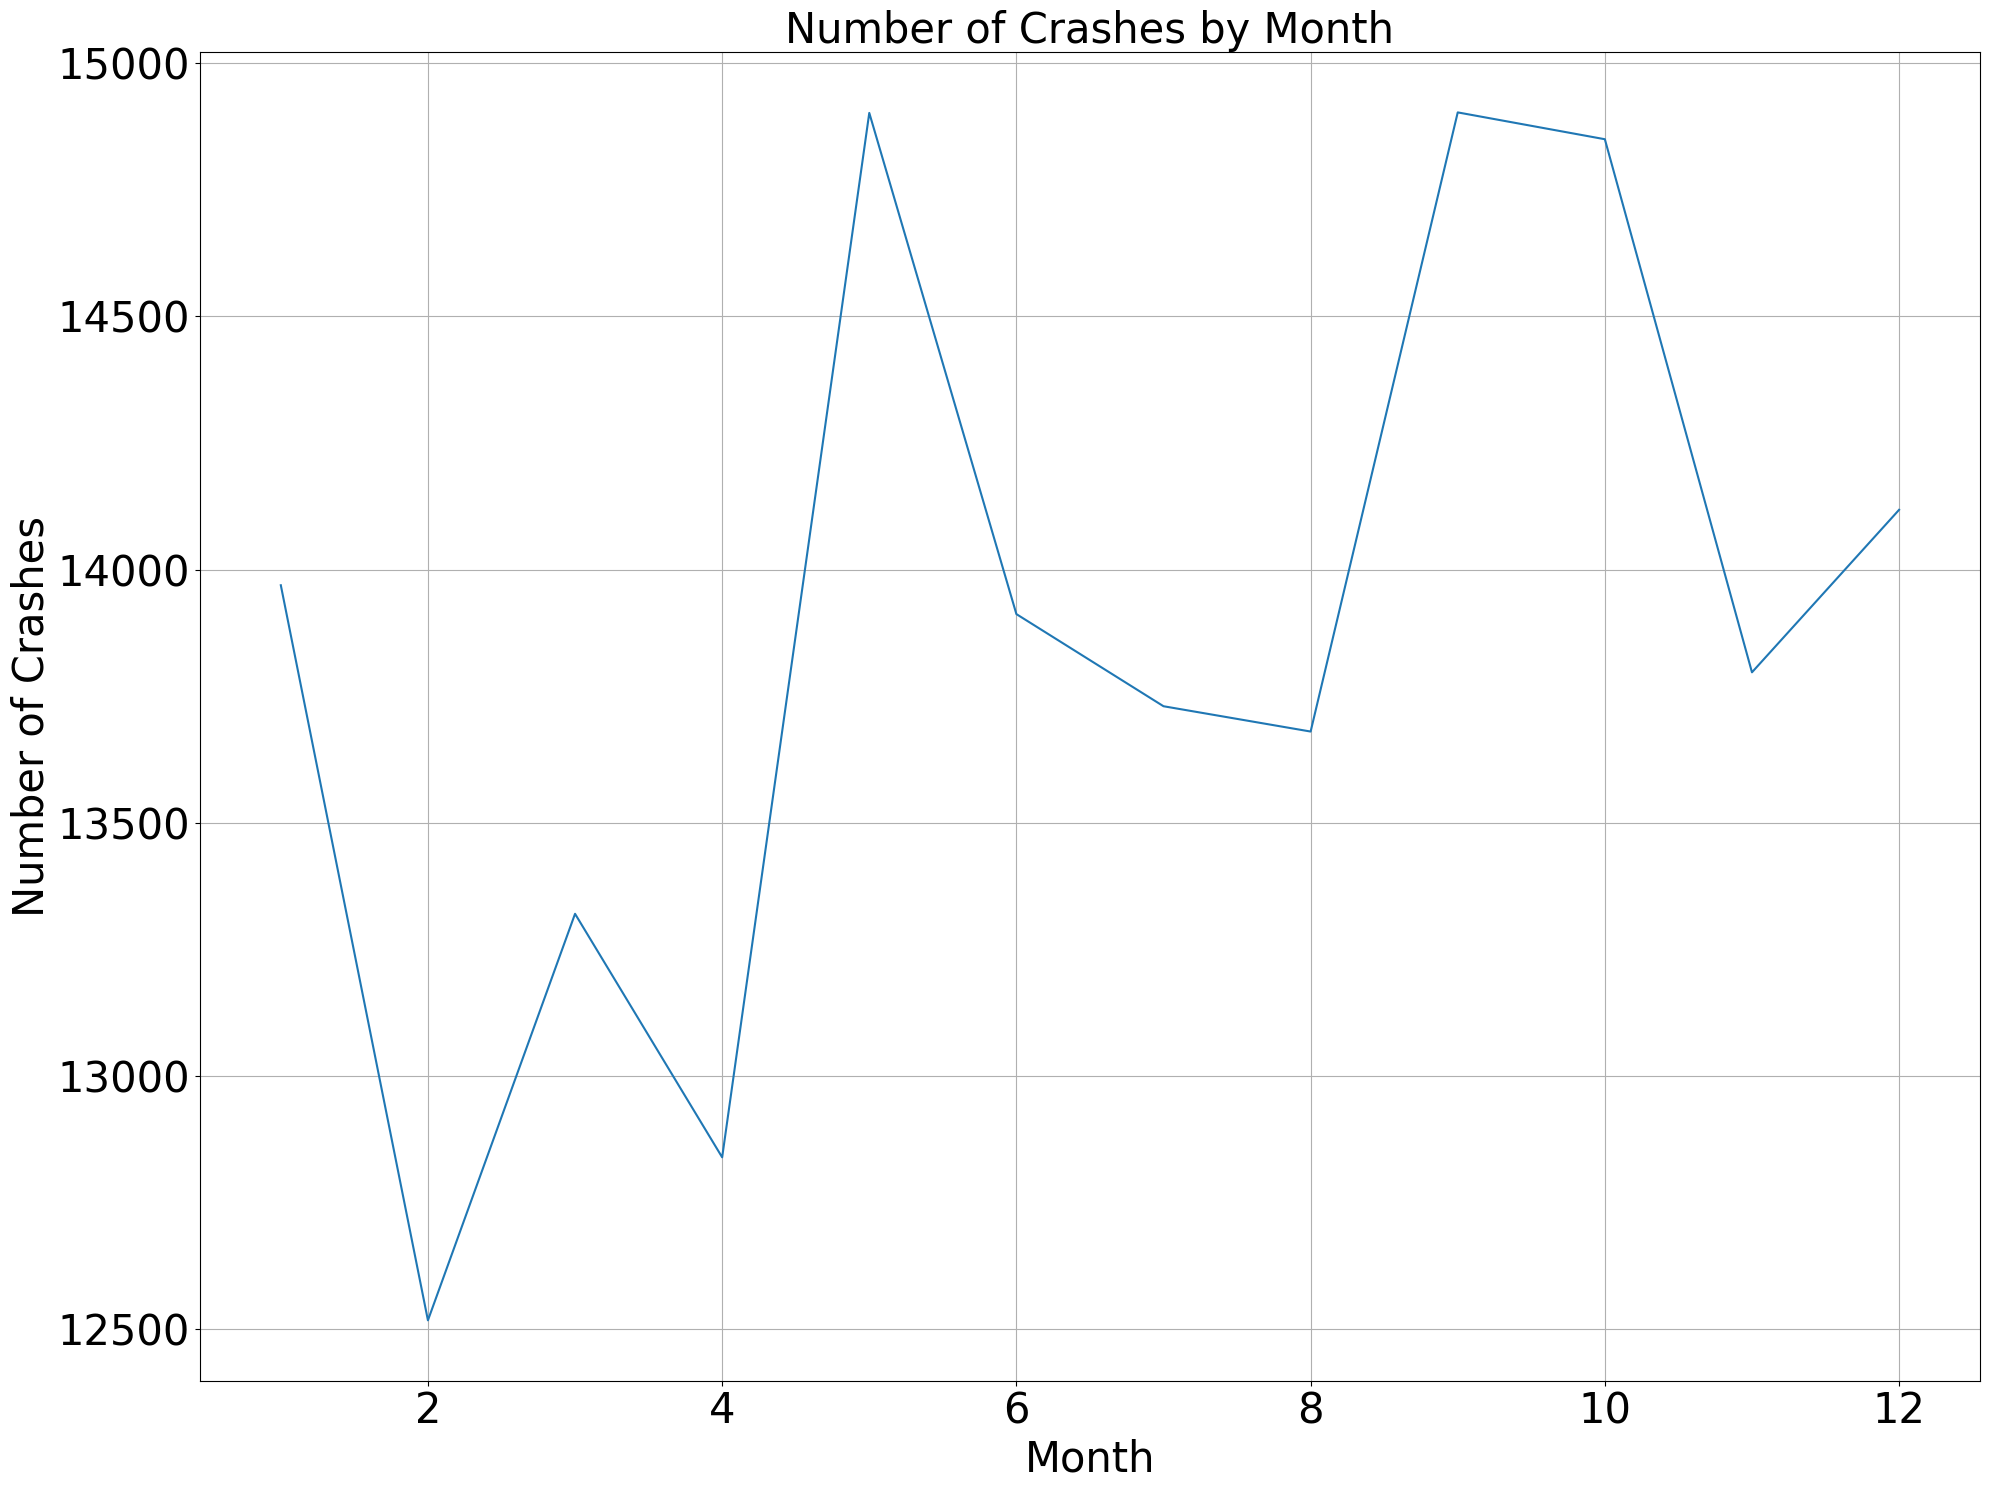

In [23]:
df['Crash Date/Time'].dt.month.value_counts().sort_index().plot(kind='line',figsize=(20, 15))
plt.title('Number of Crashes by Month', fontsize=30)
plt.xlabel('Month',fontsize=30)
plt.ylabel('Number of Crashes',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True)
plt.tight_layout();

- Least number of crashes in 2020 possibly due to covid. 
- 2023 is notably less because the year isnt over yet

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


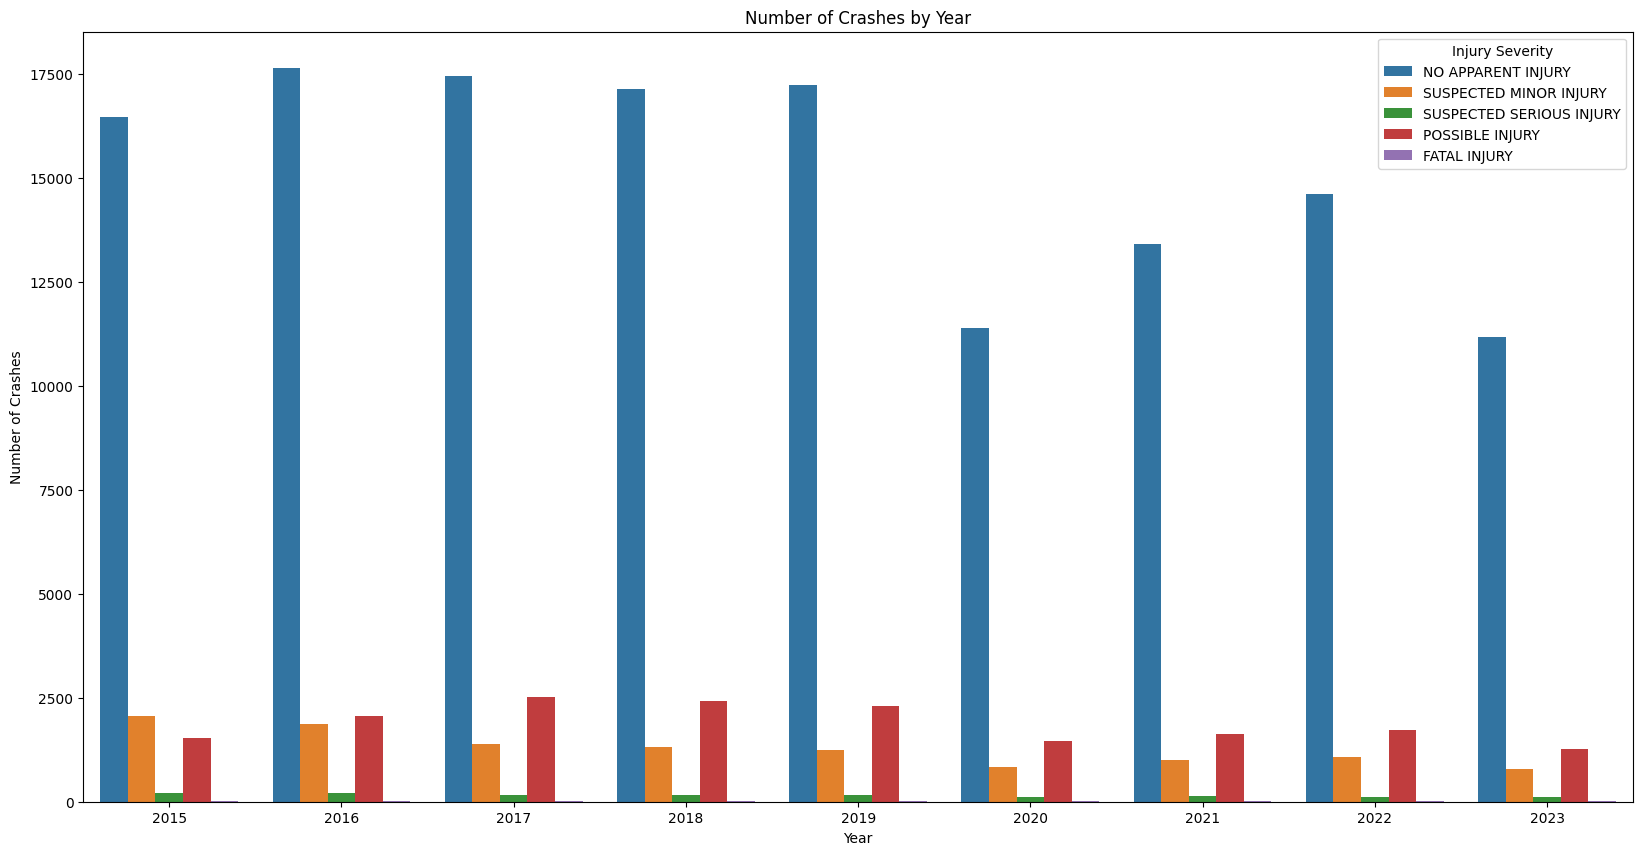

In [24]:
plt.figure(figsize=(20, 10))
sns.countplot(x=df['Crash Date/Time'].dt.year, hue=df['Injury Severity'])
plt.title('Number of Crashes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes');

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


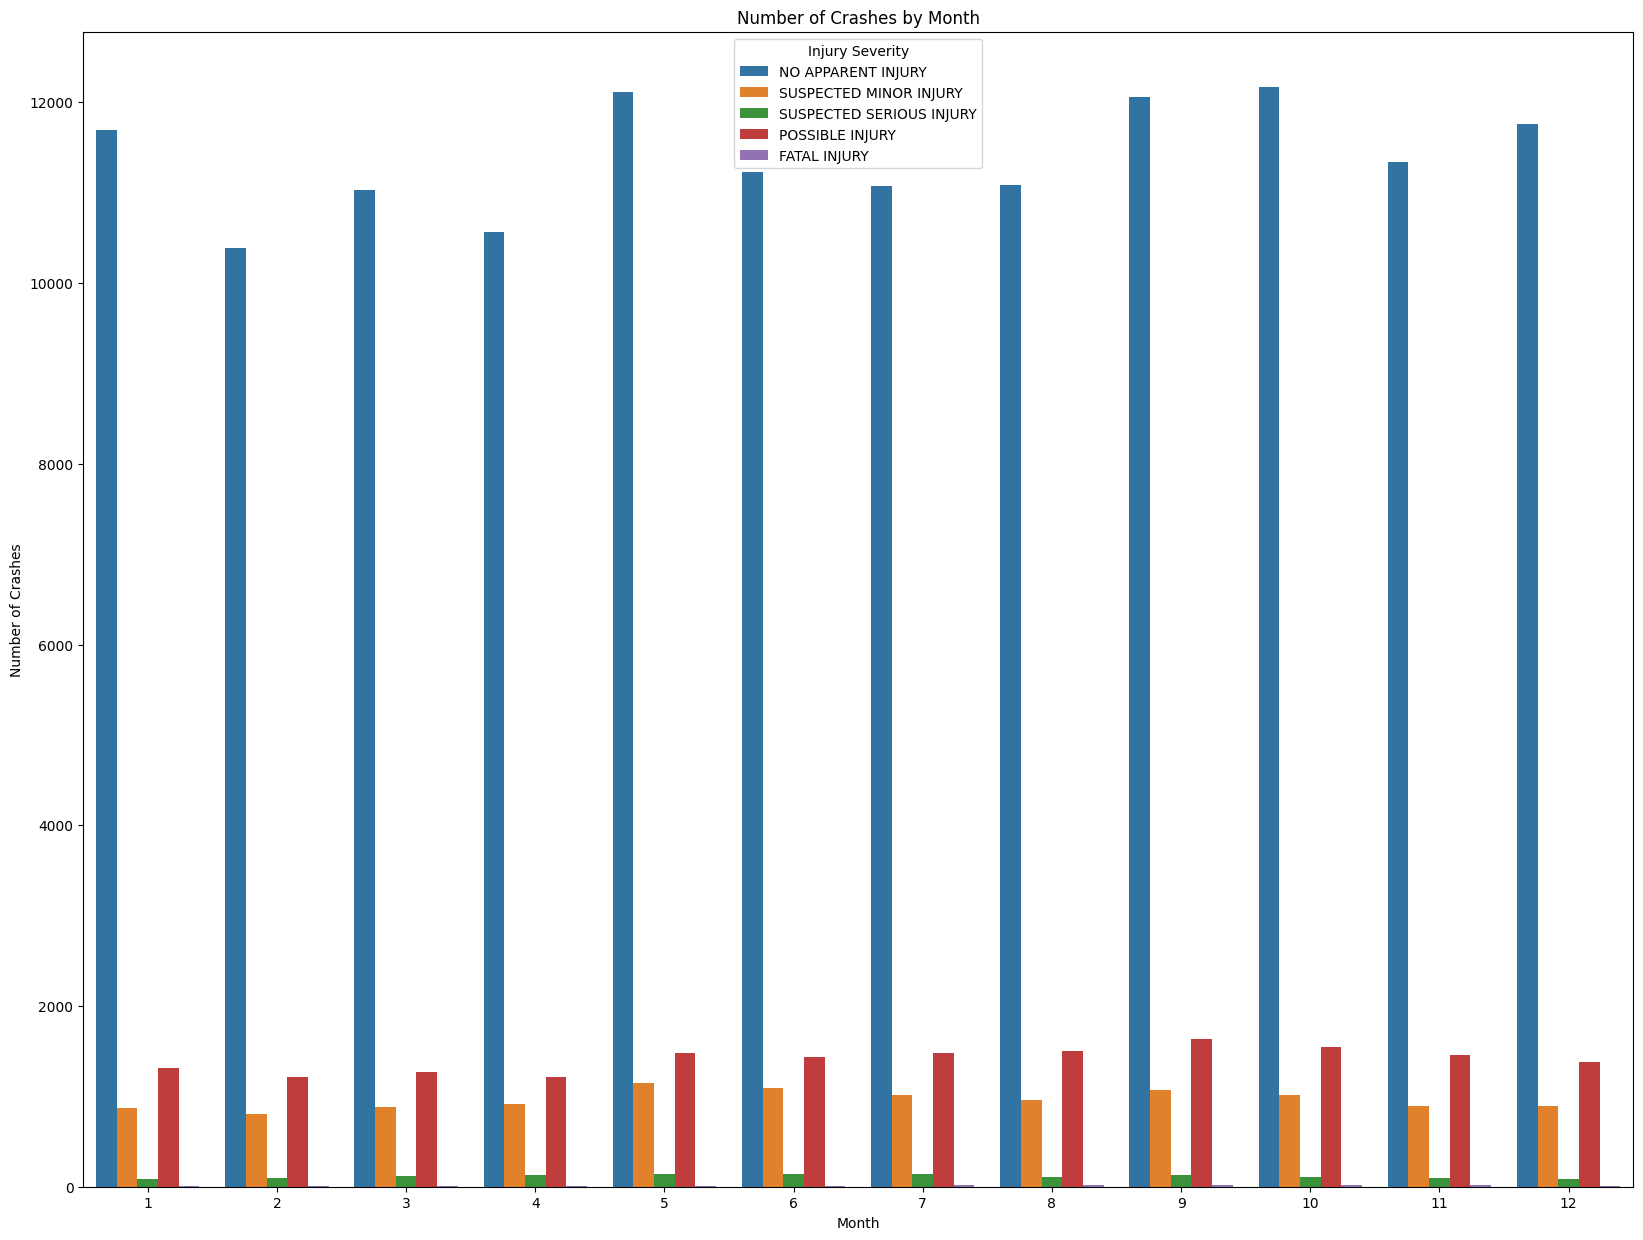

In [25]:
# crash monthly granularity
plt.figure(figsize=(20, 15))
sns.countplot(x=df['Crash Date/Time'].dt.month, hue=df['Injury Severity'])
plt.title('Number of Crashes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crashes');

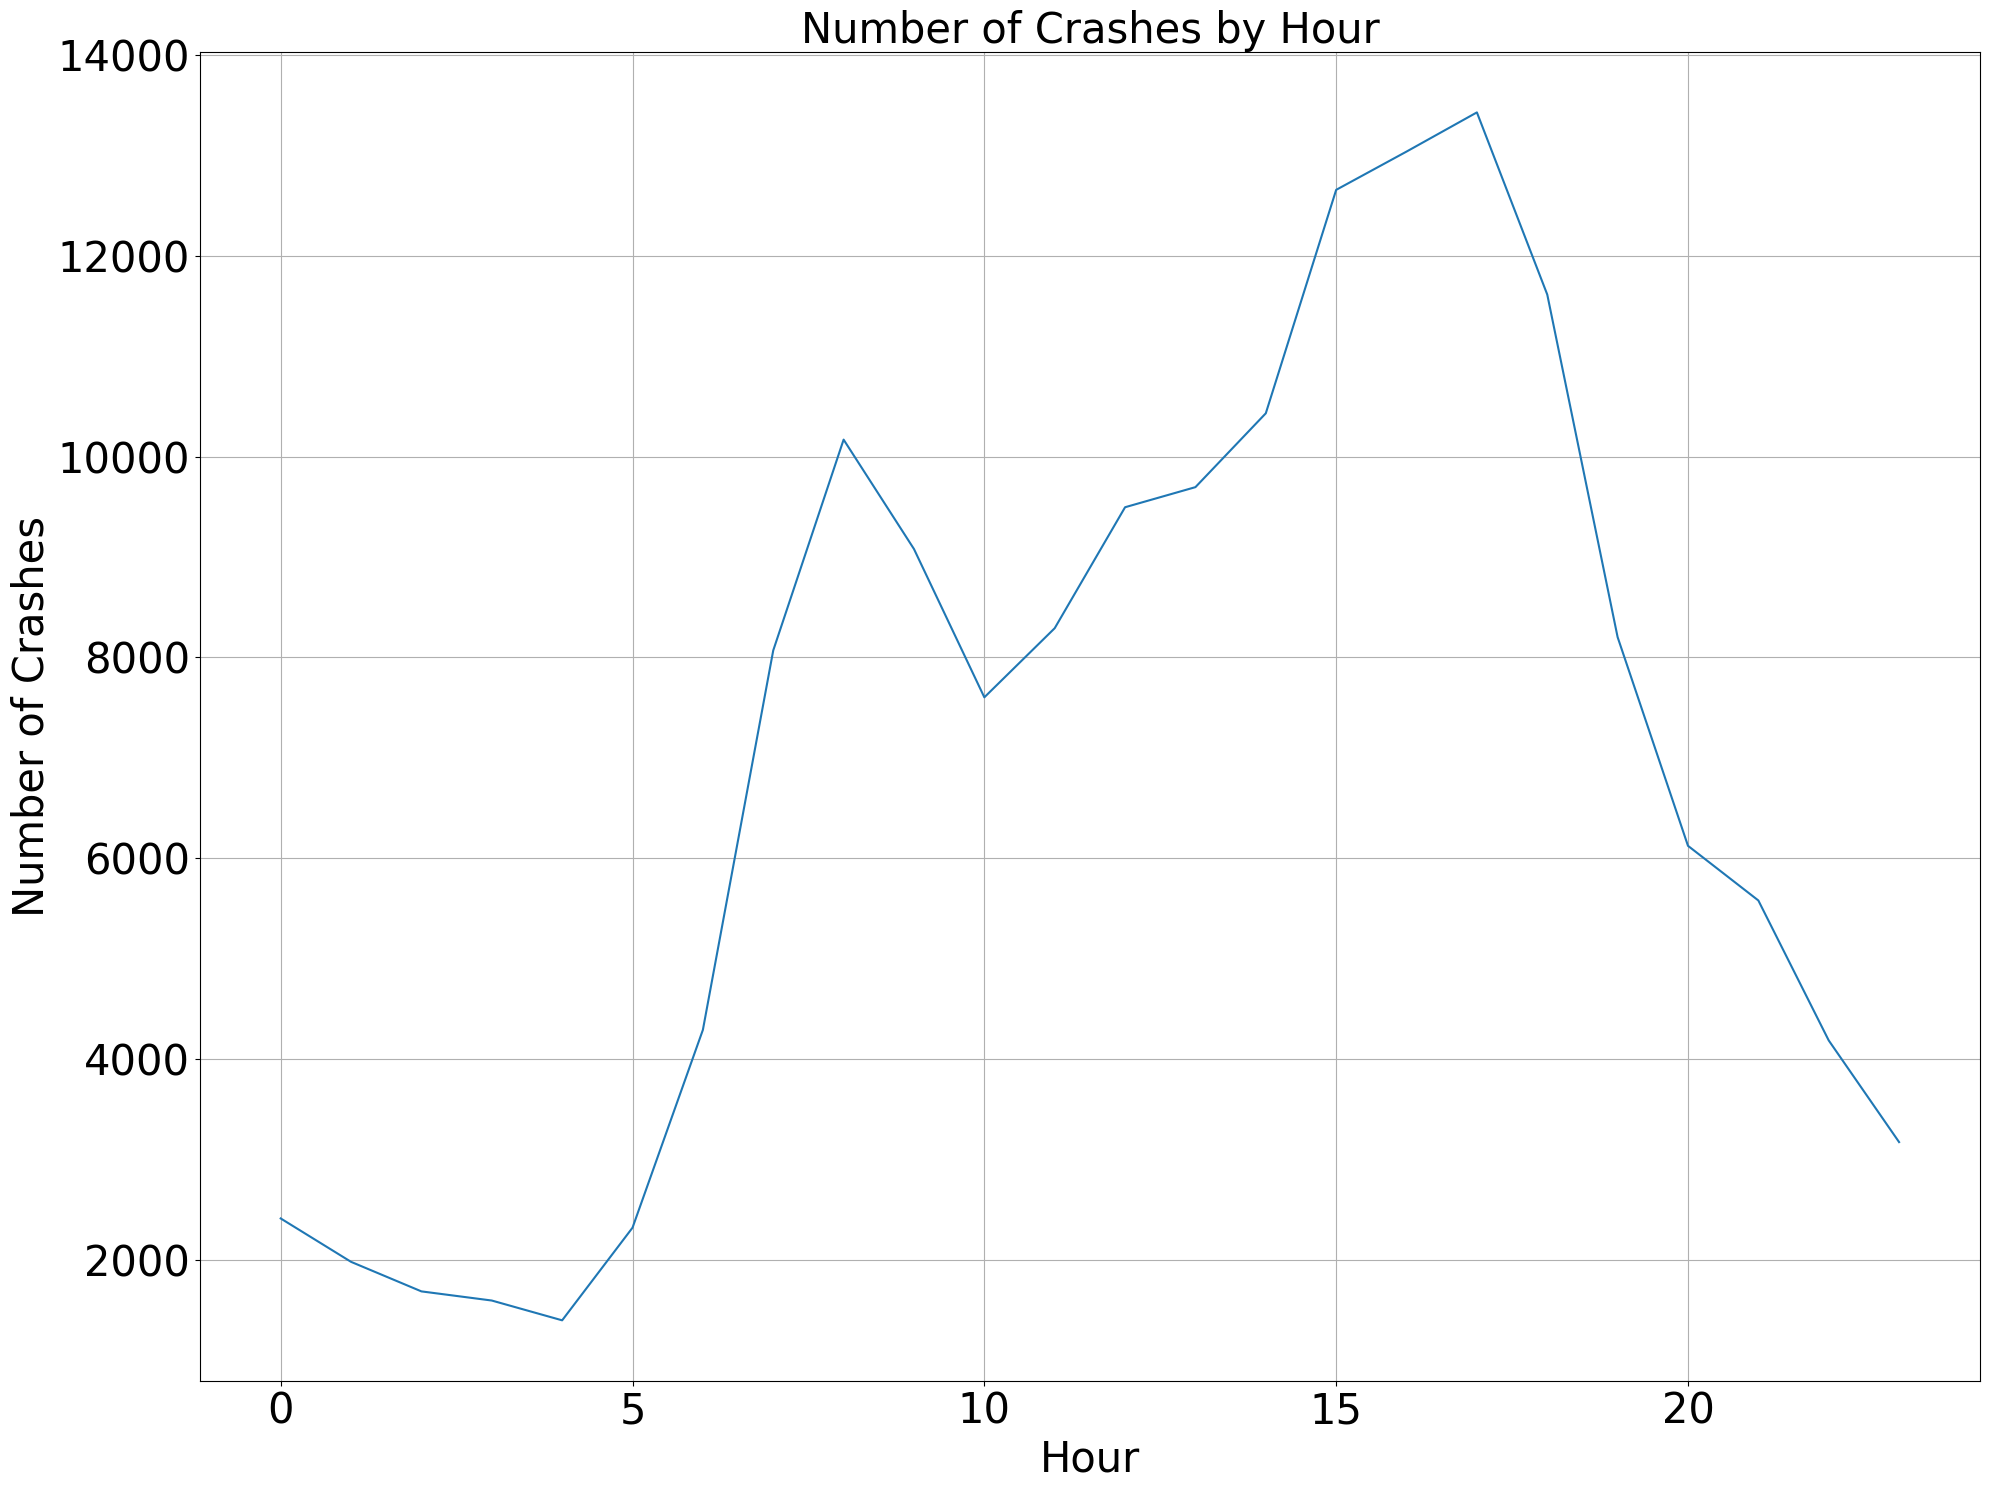

In [26]:
# accident hourly granularity and make it a line plot
plt.figure(figsize=(20, 15))
df['Crash Date/Time'].dt.hour.value_counts().sort_index().plot(kind='line')
#sns.countplot(x=df['Crash Date/Time'].dt.hour)
plt.title('Number of Crashes by Hour',fontsize=30)
plt.xlabel('Hour', fontsize=30)
plt.ylabel('Number of Crashes', fontsize=30);
# inrease the fontsize of the xticks and yticks
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True)
plt.tight_layout();


- Peak around 6pm due to rush hours

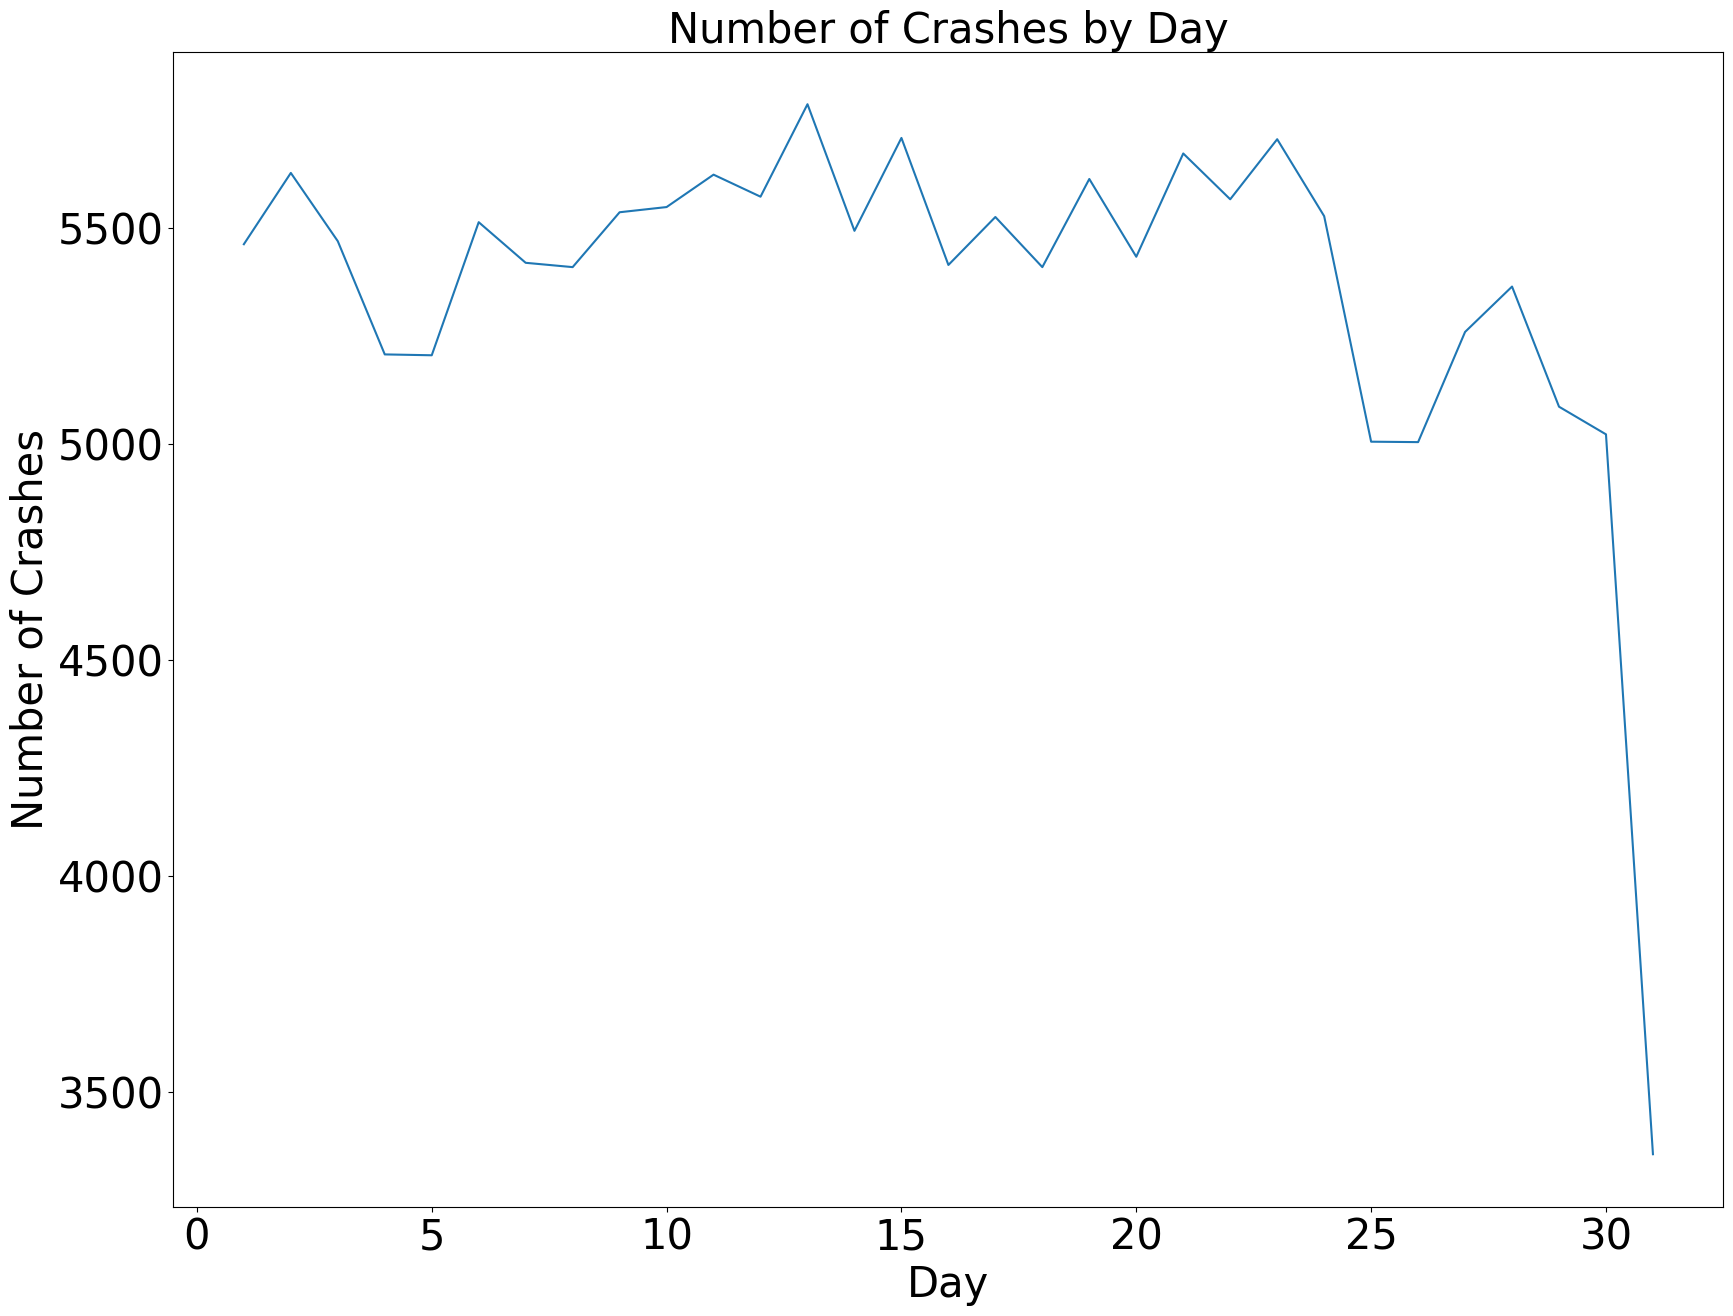

In [27]:
# accident daily granularity and make it a line plot
plt.figure(figsize=(20, 15))
df['Crash Date/Time'].dt.day.value_counts().sort_index().plot(kind='line')
plt.title('Number of Crashes by Day',fontsize=30)
plt.xlabel('Day',fontsize=30)
plt.ylabel('Number of Crashes',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30);


is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


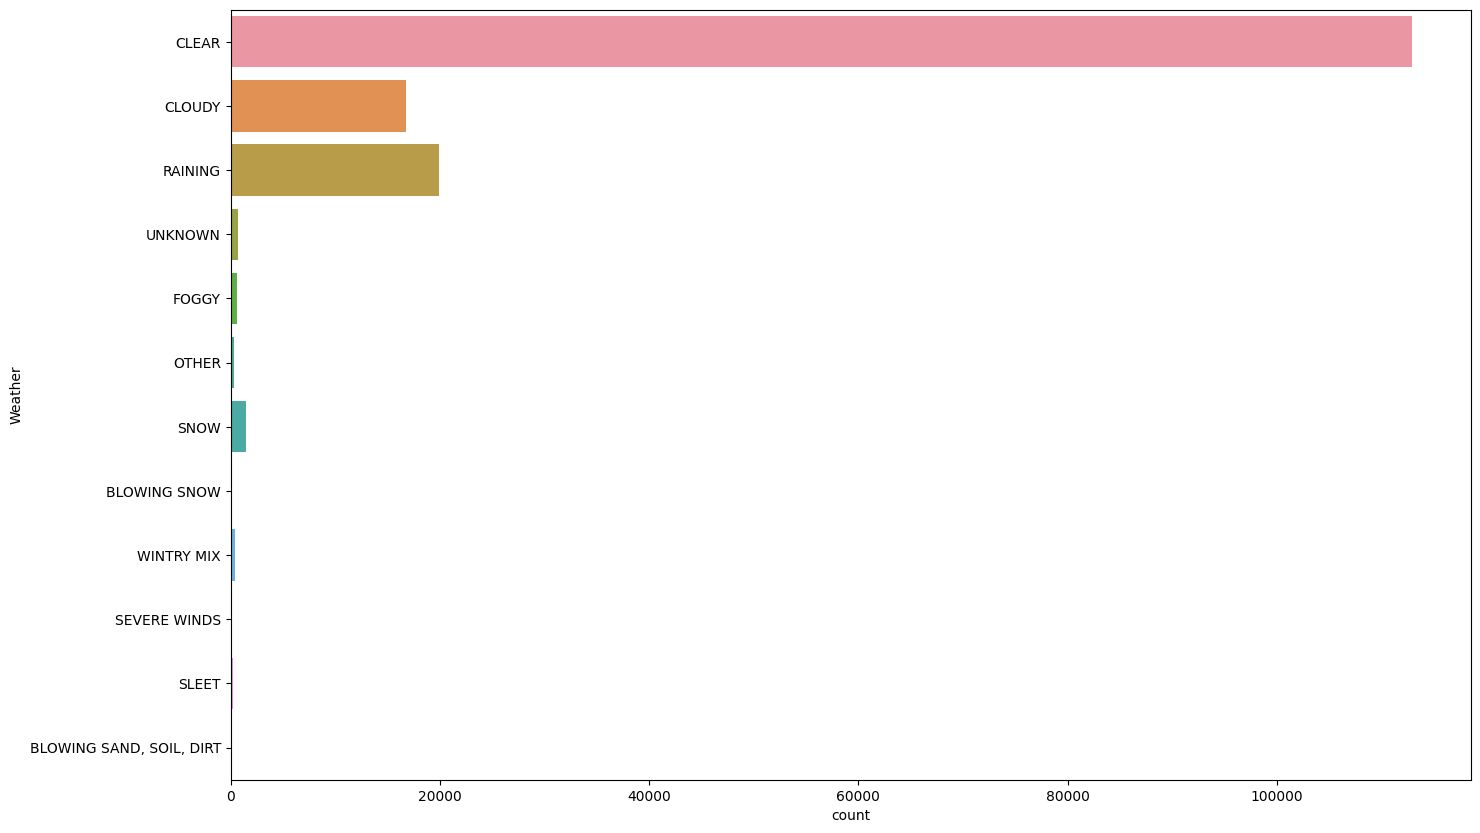

In [28]:
plt.figure(figsize=(16, 10))
sns.countplot(y=df['Weather']);

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


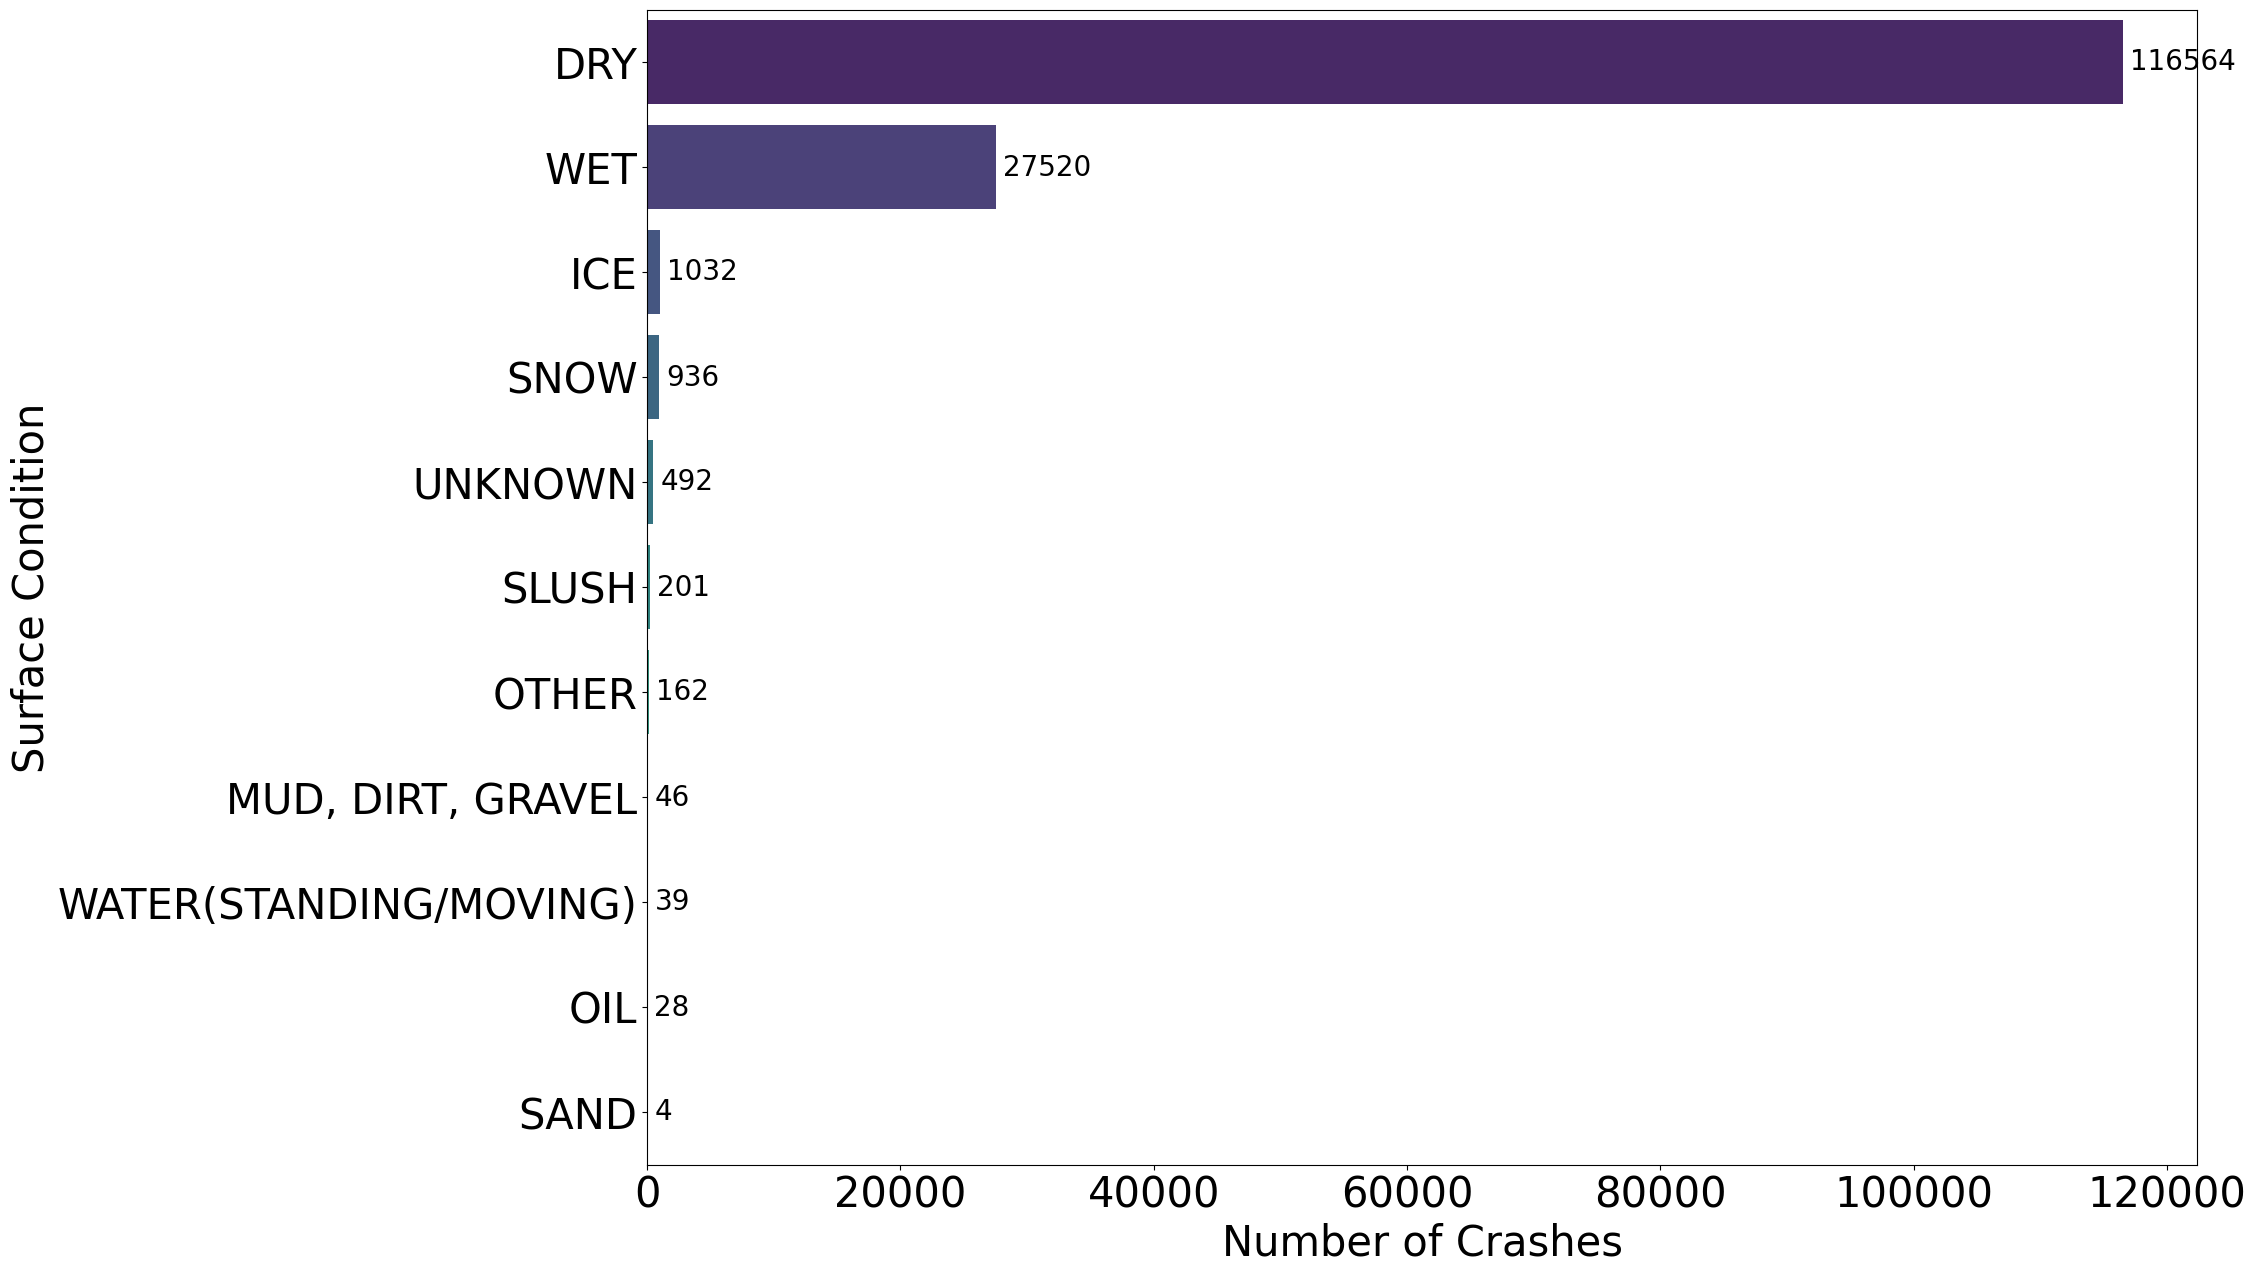

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))

# Order bars by count
order = df['Surface Condition'].value_counts().index

# Plot
ax = sns.countplot(y=df['Surface Condition'], order=order, palette="viridis")

# Annotate bars with their counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.), 
                va='center', ha='left', xytext=(5,0), textcoords='offset points', fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Number of Crashes',fontsize=30)
plt.ylabel('Surface Condition',fontsize=30)

plt.show()


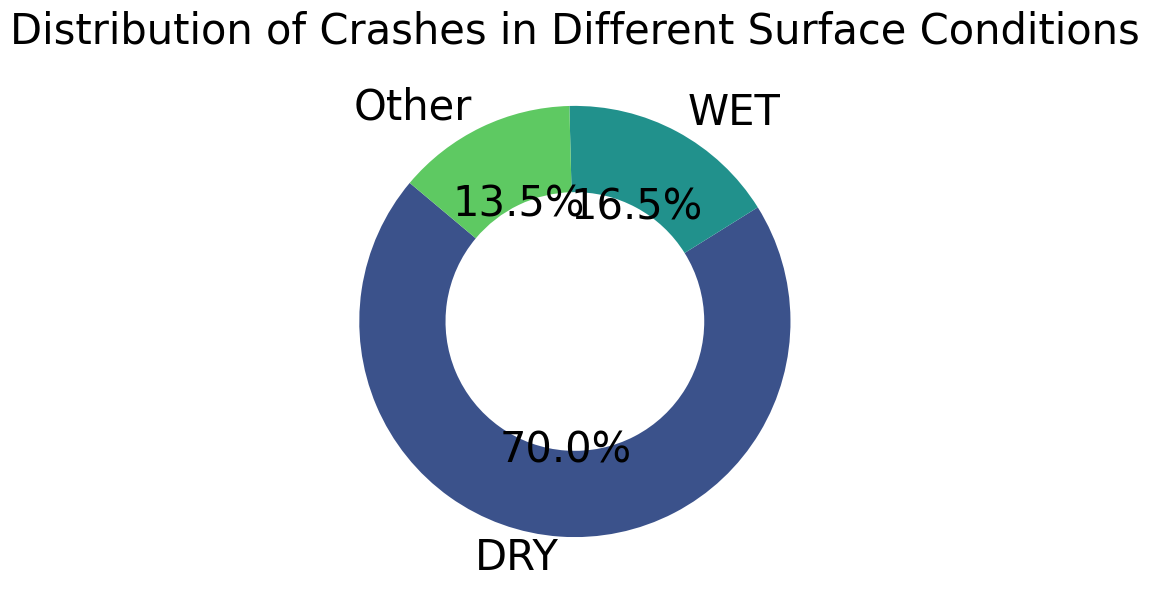

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
df['Modified Conditions']=df['Surface Condition'].apply(lambda x: 'Other' if x not in ['WET','DRY'] else x)

# Data preparation
surface_condition_counts = df['Modified Conditions'].value_counts()

# Plotting the donut chart
plt.figure(figsize=(15, 7))
colors = sns.color_palette("viridis", len(surface_condition_counts))
plt.pie(surface_condition_counts, labels=surface_condition_counts.index, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4), textprops={'fontsize': 30})
plt.title('Distribution of Crashes in Different Surface Conditions', fontsize=30)

plt.show()


# Model Building 
Before building the models, we performed the following additional preprocessing steps
- Used Kmeans to cluster the longitudes and latutitudes and created a new feature that contains the resulting clusters
- Grouped the date/time columns as follows:
    - Day column was grouped into beginning, middle, and end of the month
    - Hour column was grouped into morning, afternoon, evening, and night
    - Month column was grouped into summer, winter, spring, and fall
   
- We grouped all instatnces of injury and fatality in the injury severity column as injury and others as no injury
 loss. Also, we will benefit from the improved speed that comes with working with less obeservations
## Handling Missing Values
- We dropped the following columns because they have too many missing values: 'Off-Road Description', 'Municipality', 'Related Non-Motorist', 'Circumstance', 'Non-Motorist Substance Abuse'
- For the remaining missing values, we dropped the rows with missing values and assessed data loss afterwards; however, we stored the resulting dataframe separately.
- We decided to drop the rows because we have many observations in the dataset
- After dropping the missing values, we assessed the data loss; we found that dropping the missing values did not lead to significant data
 - In addition to dropping null values, we dropped all the observations with unknown
- All Eda was done using the original dataframe, while modelling was done using the cleaned dataframe.

## Class Distribution 
- There is a class imbalance in the data set with a ratio of 70-30 with the postive instances being the minority class.
- To deal with this we tried several methods. First, we used the inbuilt class weight funtion in Random forest. To assigns a bigger weight to the minority class. Since XGBoost doesnt have the class weight paramet, we used its  equivalent for XGBoost which is Scale-pos-weight.
- We also tried undersampling to see if performance will improve. We thought this will be a good idea because the dataset is large, and we would benefit from the improved speed.

In [31]:
df2['Injury Severity'].value_counts(normalize=True)

Injury Severity
NO APPARENT INJURY          0.793781
POSSIBLE INJURY             0.118925
SUSPECTED MINOR INJURY      0.077997
SUSPECTED SERIOUS INJURY    0.008570
FATAL INJURY                0.000727
Name: proportion, dtype: float64

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


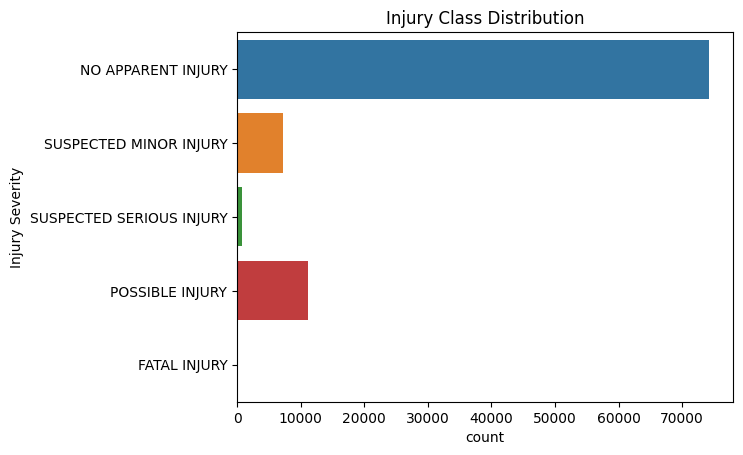

In [32]:
sns.countplot(y=df2['Injury Severity']);
plt.title('Injury Class Distribution');

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93580 entries, 1 to 166535
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ACRS Report Type                93580 non-null  object        
 1   Crash Date/Time                 93580 non-null  datetime64[ns]
 2   Route Type                      93580 non-null  object        
 3   Road Name                       93580 non-null  object        
 4   Cross-Street Type               93580 non-null  object        
 5   Cross-Street Name               93580 non-null  object        
 6   Collision Type                  93580 non-null  object        
 7   Weather                         93580 non-null  object        
 8   Surface Condition               93580 non-null  object        
 9   Light                           93580 non-null  object        
 10  Traffic Control                 93580 non-null  object        
 11  Injury

In [34]:
# drop observations with 'UNKNOWN' and 'Unknown' in the entire dataset
df2=df.dropna()
df2.replace(['UNKNOWN', 'Unknown'], np.nan, inplace=True)
df2.dropna(inplace=True)
df2.shape


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(81123, 30)

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


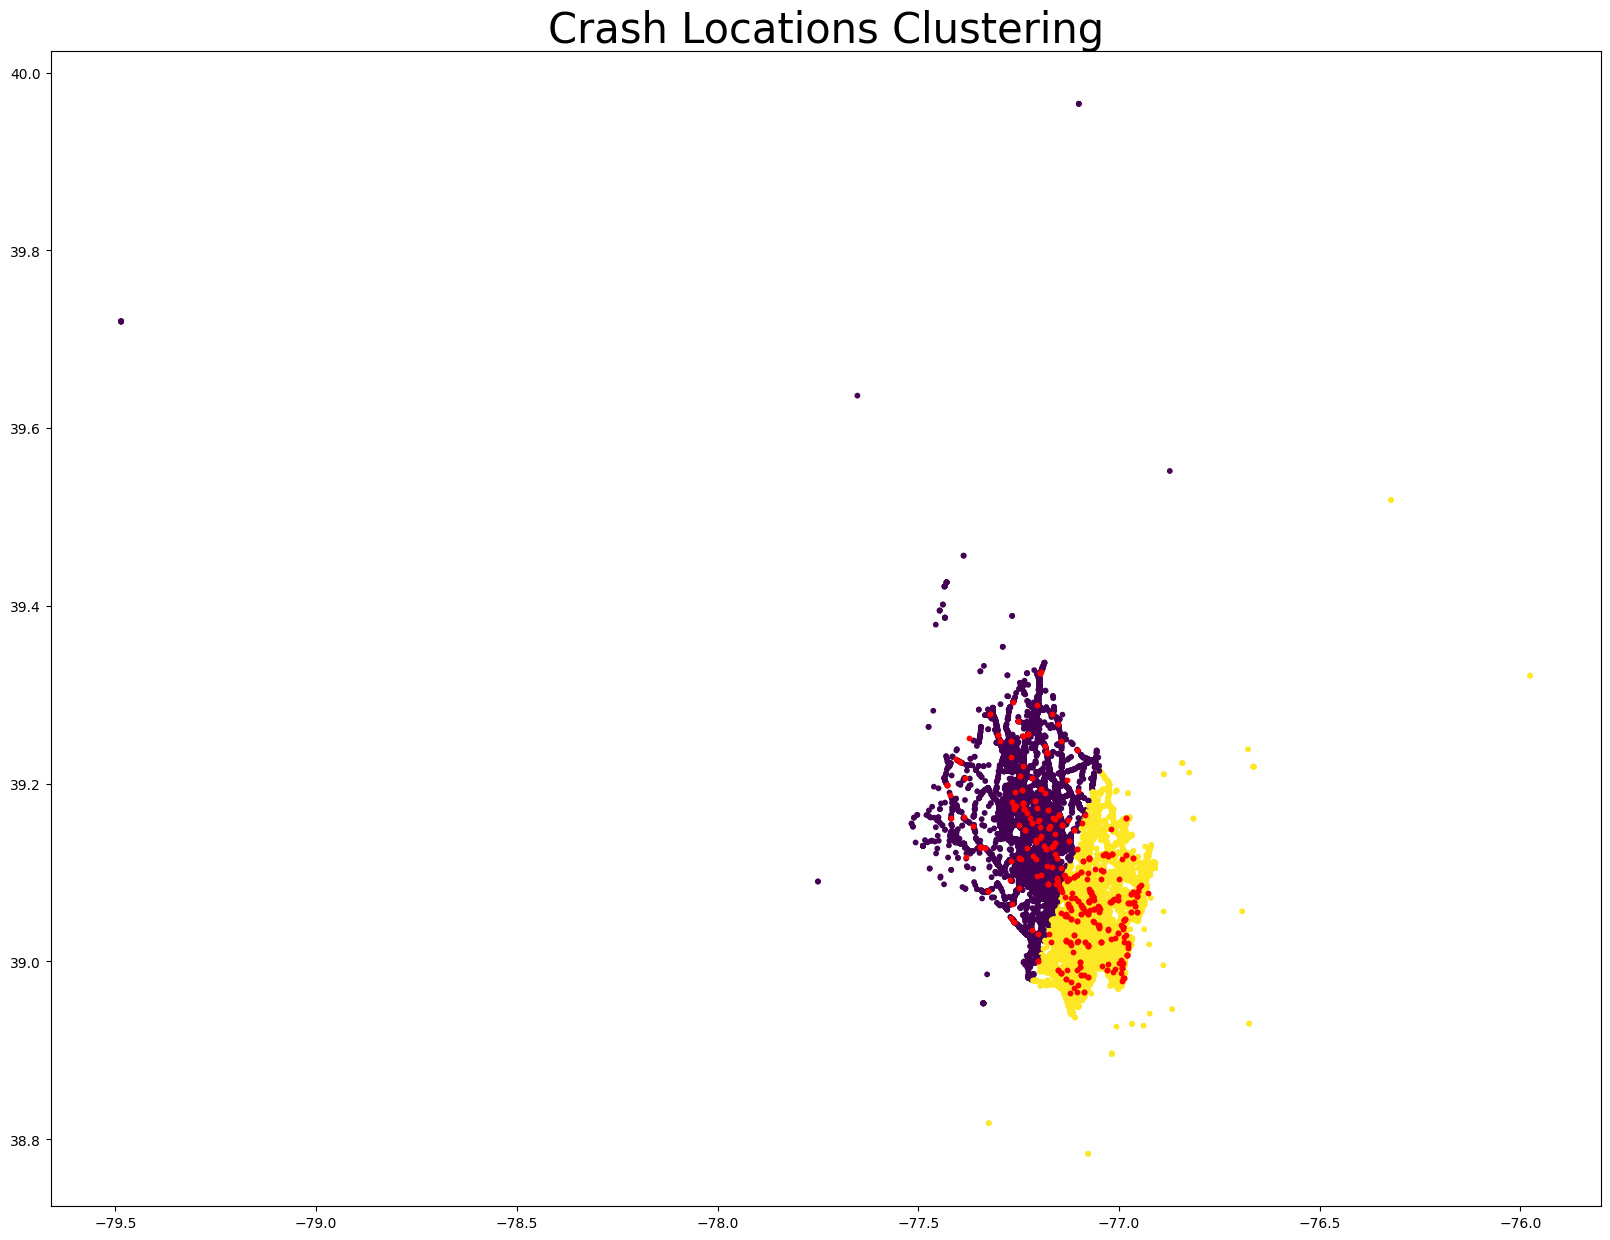

In [35]:
model=KMeans(n_clusters=2)
model.fit(df2[['Longitude','Latitude']])
clusters=model.predict(df2[['Longitude','Latitude']])
plt.figure(figsize=(20, 15))
plt.scatter(df2['Longitude'],df2['Latitude'],c=clusters,s=10,cmap='viridis')
plt.title('Crash Locations Clustering',fontsize=30)

plt.scatter (Fatal_Crashes['Longitude'],
                Fatal_Crashes['Latitude'],
                color='red',
                s=10);


In [36]:
df2['location_cluster']=clusters
df2.drop(['Longitude','Latitude'],axis=1,inplace=True)
df2['location_cluster'].value_counts()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


location_cluster
1    49616
0    31507
Name: count, dtype: int64

In [37]:
df2['location_cluster'].replace({0:'Location_cluster_1',1:'Location_cluster_2'},inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [38]:
df2['location_cluster'].value_counts()

location_cluster
Location_cluster_2    49616
Location_cluster_1    31507
Name: count, dtype: int64

In [39]:
# print the value_counts for each categorical feature using for loop
for col in df2.select_dtypes(include='object').columns:
    print(df2[col].value_counts())
    print('---------------------')


ACRS Report Type
Property Damage Crash    47802
Injury Crash             33140
Fatal Crash                181
Name: count, dtype: int64
---------------------
Route Type
Maryland (State)        41501
County                  28981
Municipality             4587
US (State)               3692
Interstate (State)       1175
Other Public Roadway      567
Ramp                      341
Government                262
Service Road               17
Name: count, dtype: int64
---------------------
Road Name
GEORGIA AVE          5573
NEW HAMPSHIRE AVE    3343
FREDERICK RD         3243
CONNECTICUT AVE      2375
ROCKVILLE PIKE       2304
                     ... 
MONTGOMERY ST           1
TAMWORTH LA             1
BENALDER DR             1
VIKING RD               1
MUNSON ST               1
Name: count, Length: 2306, dtype: int64
---------------------
Cross-Street Type
County                  49224
Maryland (State)        13733
Municipality            10587
Ramp                     3510
Other Public Road

In [40]:
# Separating datetime to year, month, day, hour. However, we will not use year as it is not a good predictor
df2['Month'] = df2['Crash Date/Time'].dt.month
df2['Day'] = df2['Crash Date/Time'].dt.day
df2['Hour'] = df2['Crash Date/Time'].dt.hour

# Group months into seasons, hour into morning, afternoon, evening, night
df2['Season'] = df2['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else ('Spring' if x in [3, 4, 5] else ('Summer' if x in [6, 7, 8] else 'Fall')))
df2['Time of Day'] = df2['Hour'].apply(lambda x: 'Morning' if x in [6, 7, 8, 9, 10, 11] else ('Afternoon' if x in [12, 13, 14, 15, 16, 17] else ('Evening' if x in [18, 19, 20, 21, 22, 23] else 'Night')))
df2['Time of Month'] = df2['Day'].apply(lambda x: 'Start' if x in [1, 2, 3, 4, 5, 6, 7] else ('Middle' if x in [8, 9, 10, 11, 12, 13, 14] else 'End'))
df2.drop(['Crash Date/Time', 'Month', 'Day', 'Hour'], axis=1, inplace=True)



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [41]:
# dropping the following columns because they have too many unique values; they most likely wont be good predictors, and some of them are identifiers: Veicle Make, Vehicle Model, Drivers License State, Roade Name,and Cross-Street Name
df2.drop(['Vehicle Make', 'ACRS Report Type', 'Vehicle Model', 'Drivers License State', 'Road Name', 'Cross-Street Name'], axis=1, inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [42]:
df2.replace({'Injury Severity': {'POSSIBLE INJURY': 1, 'SUSPECTED MINOR INJURY': 1, 'SUSPECTED SERIOUS INJURY': 1, 'FATAL INJURY': 1, 'NO APPARENT INJURY': 0}}, inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [43]:
df2['Injury Severity'].value_counts(normalize=True) 

Injury Severity
0    0.791761
1    0.208239
Name: proportion, dtype: float64

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


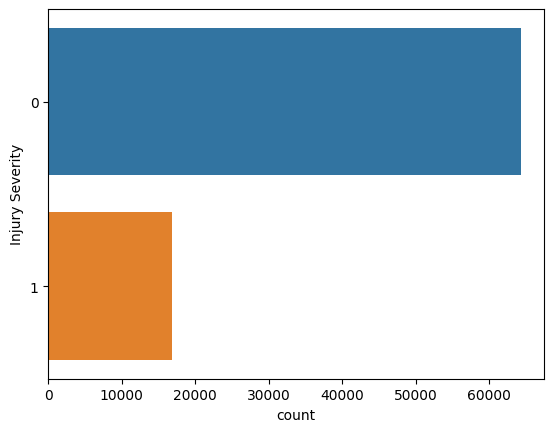

In [44]:
sns.countplot(y=df2['Injury Severity']);

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


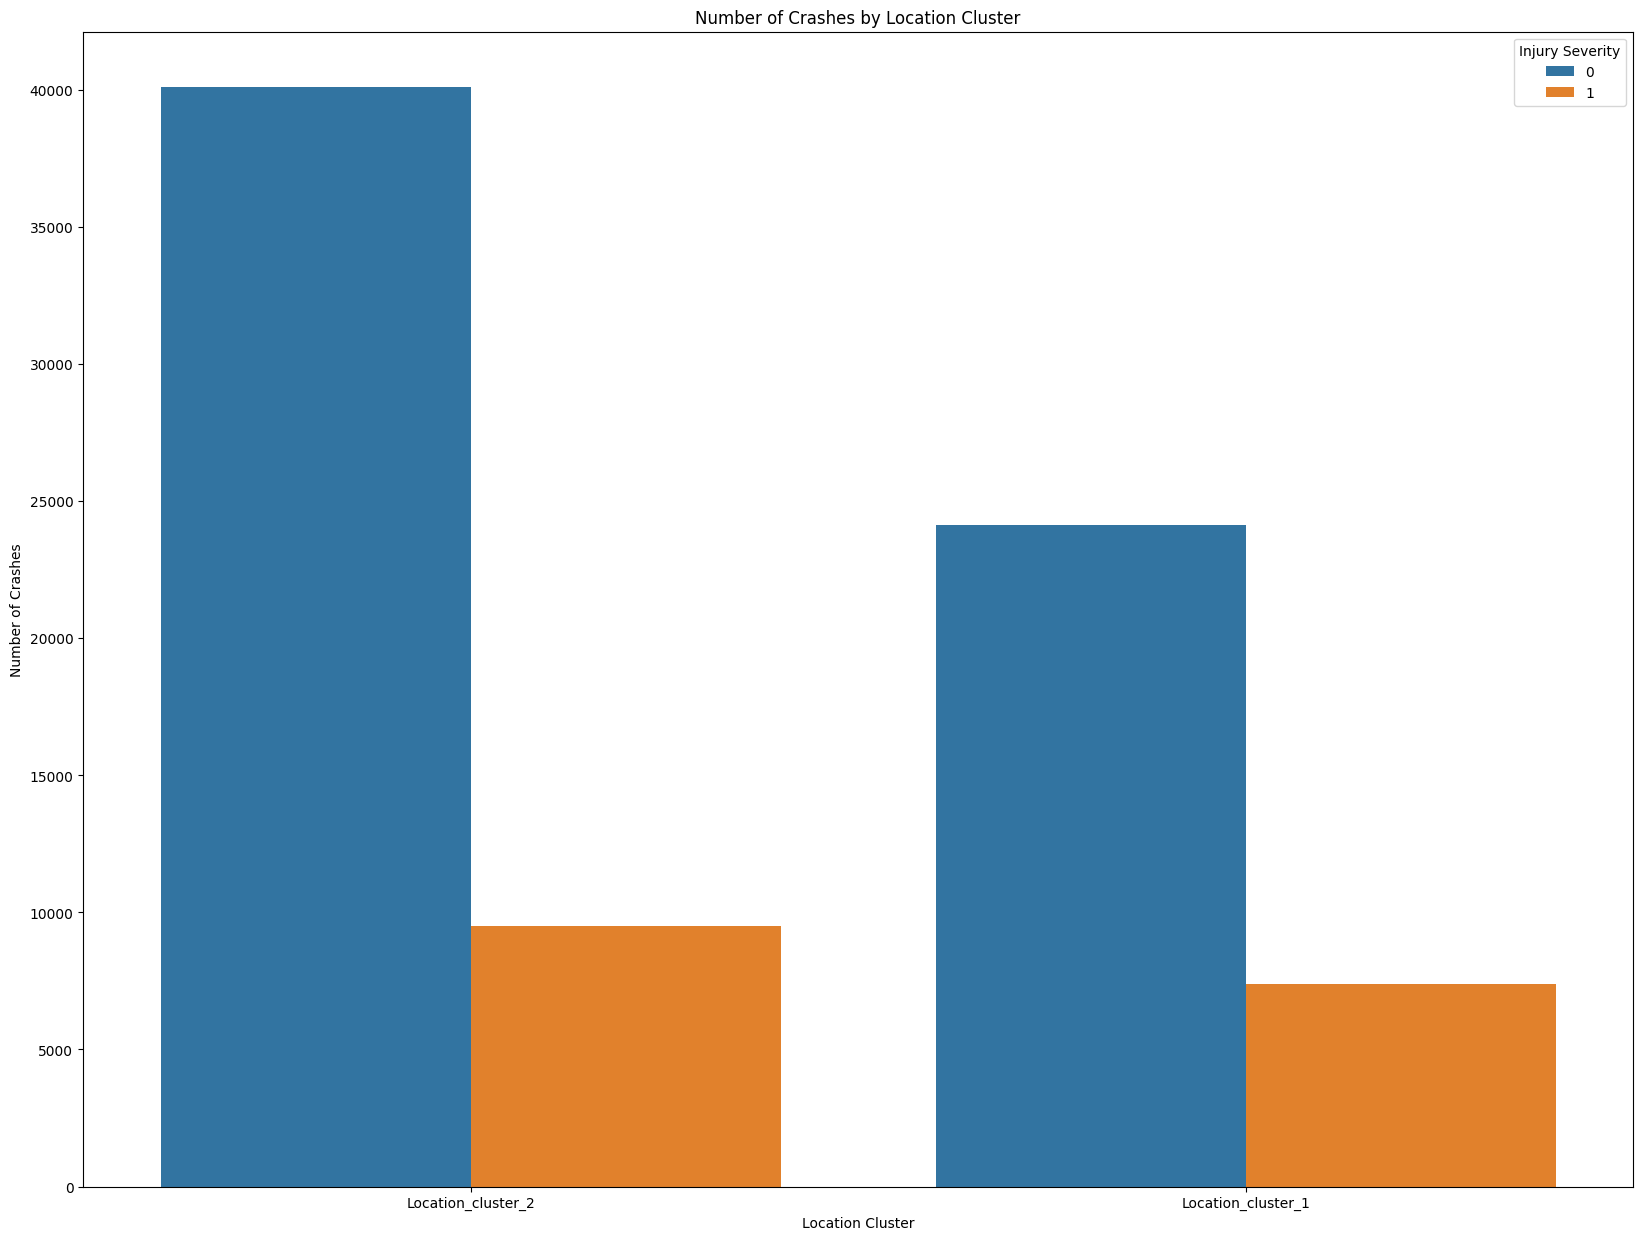

In [45]:
plt.figure(figsize=(20, 15))
sns.countplot(x=df2['location_cluster'], hue=df2['Injury Severity'])
plt.title('Number of Crashes by Location Cluster')
plt.xlabel('Location Cluster')
plt.ylabel('Number of Crashes');

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


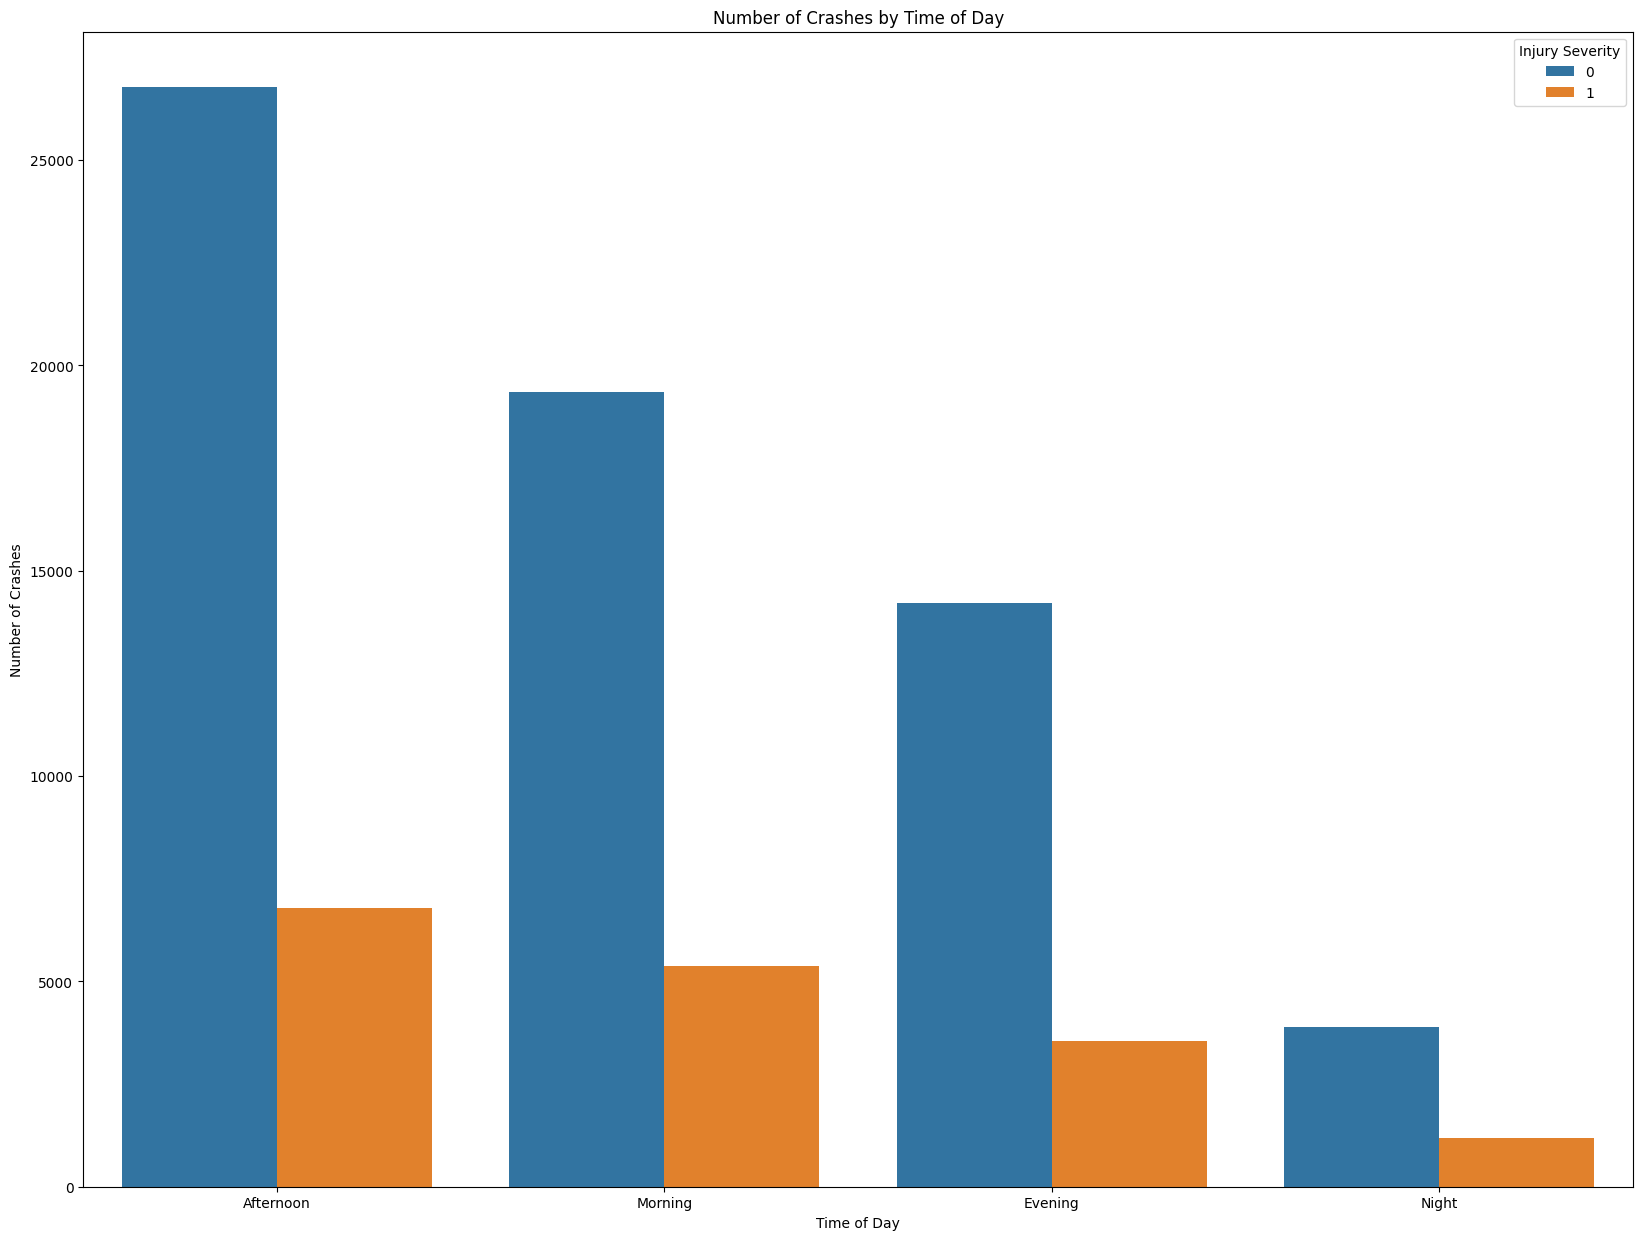

In [46]:
plt.figure(figsize=(20, 15))
sns.countplot(x=df2['Time of Day'], hue=df2['Injury Severity'])
plt.title('Number of Crashes by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Crashes');


is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


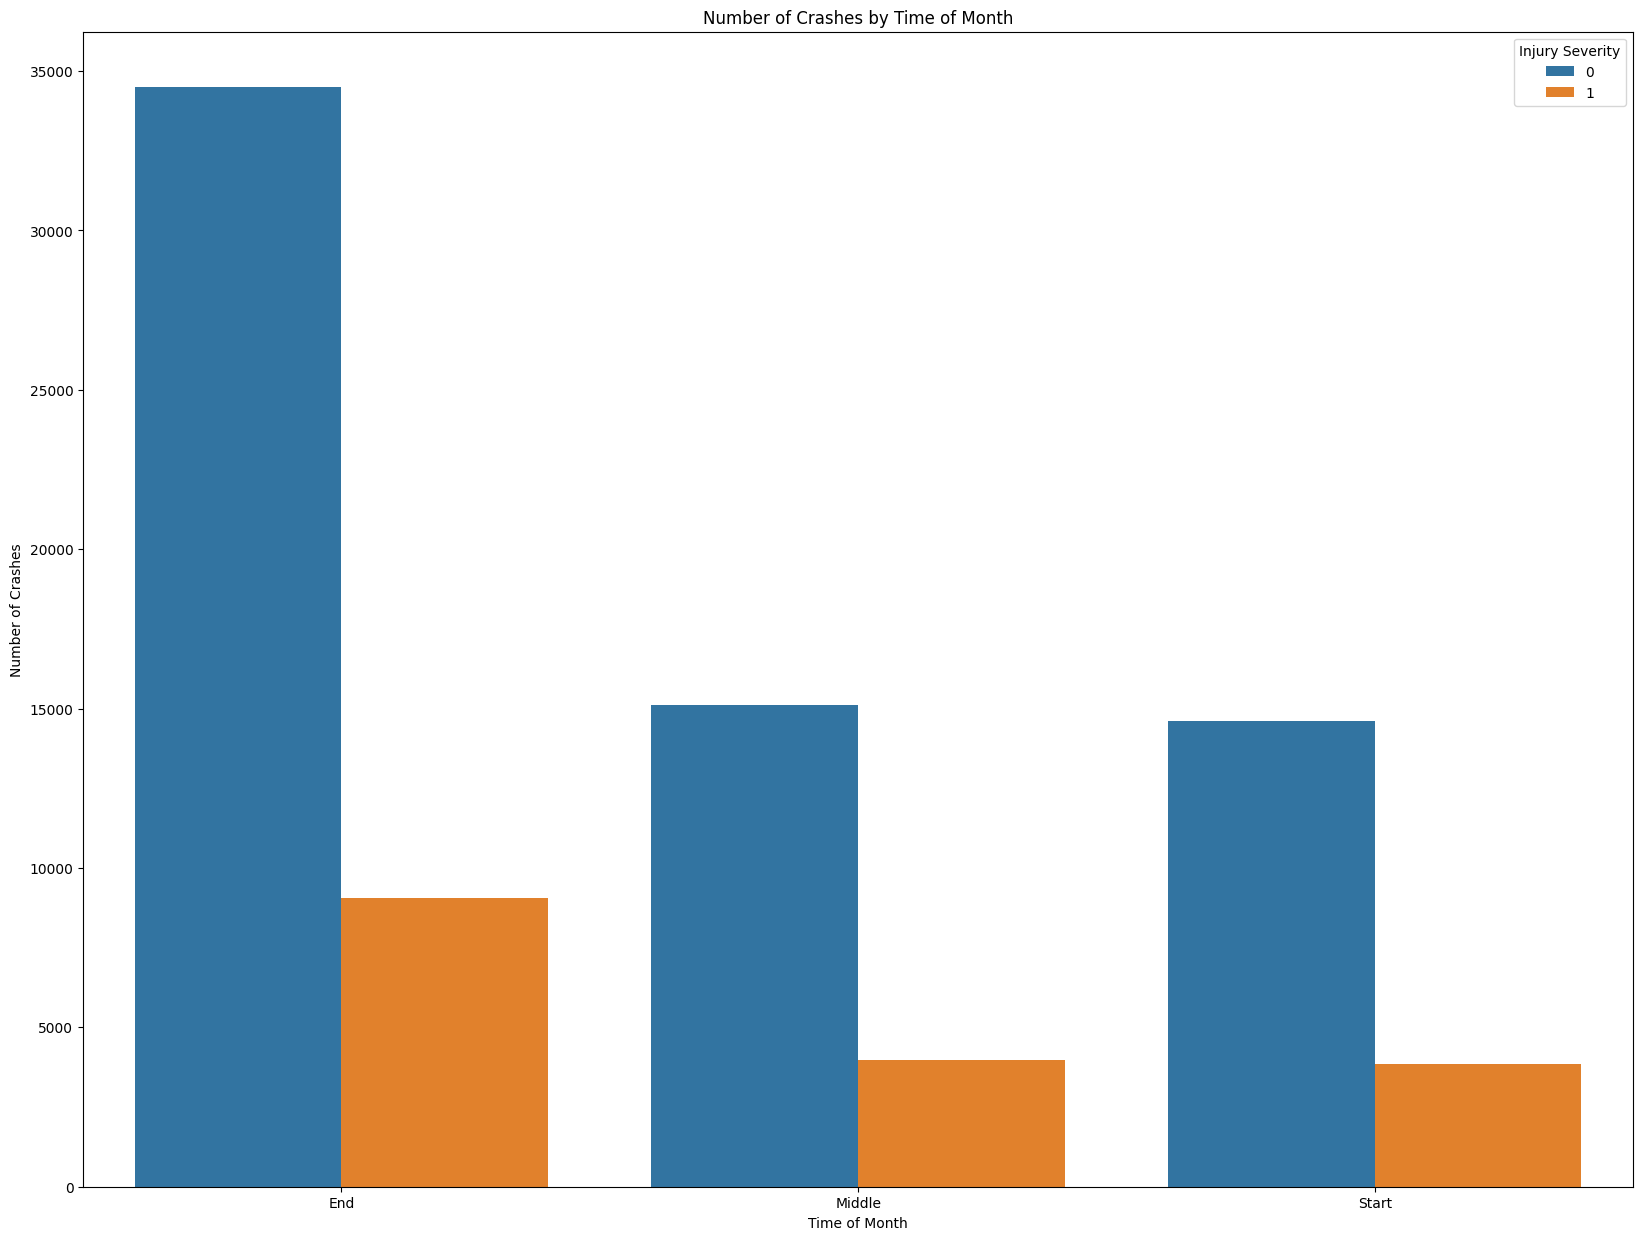

In [47]:
plt.figure(figsize=(20, 15))
sns.countplot(x=df2['Time of Month'], hue=df2['Injury Severity'])
plt.title('Number of Crashes by Time of Month')
plt.xlabel('Time of Month')
plt.ylabel('Number of Crashes');

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


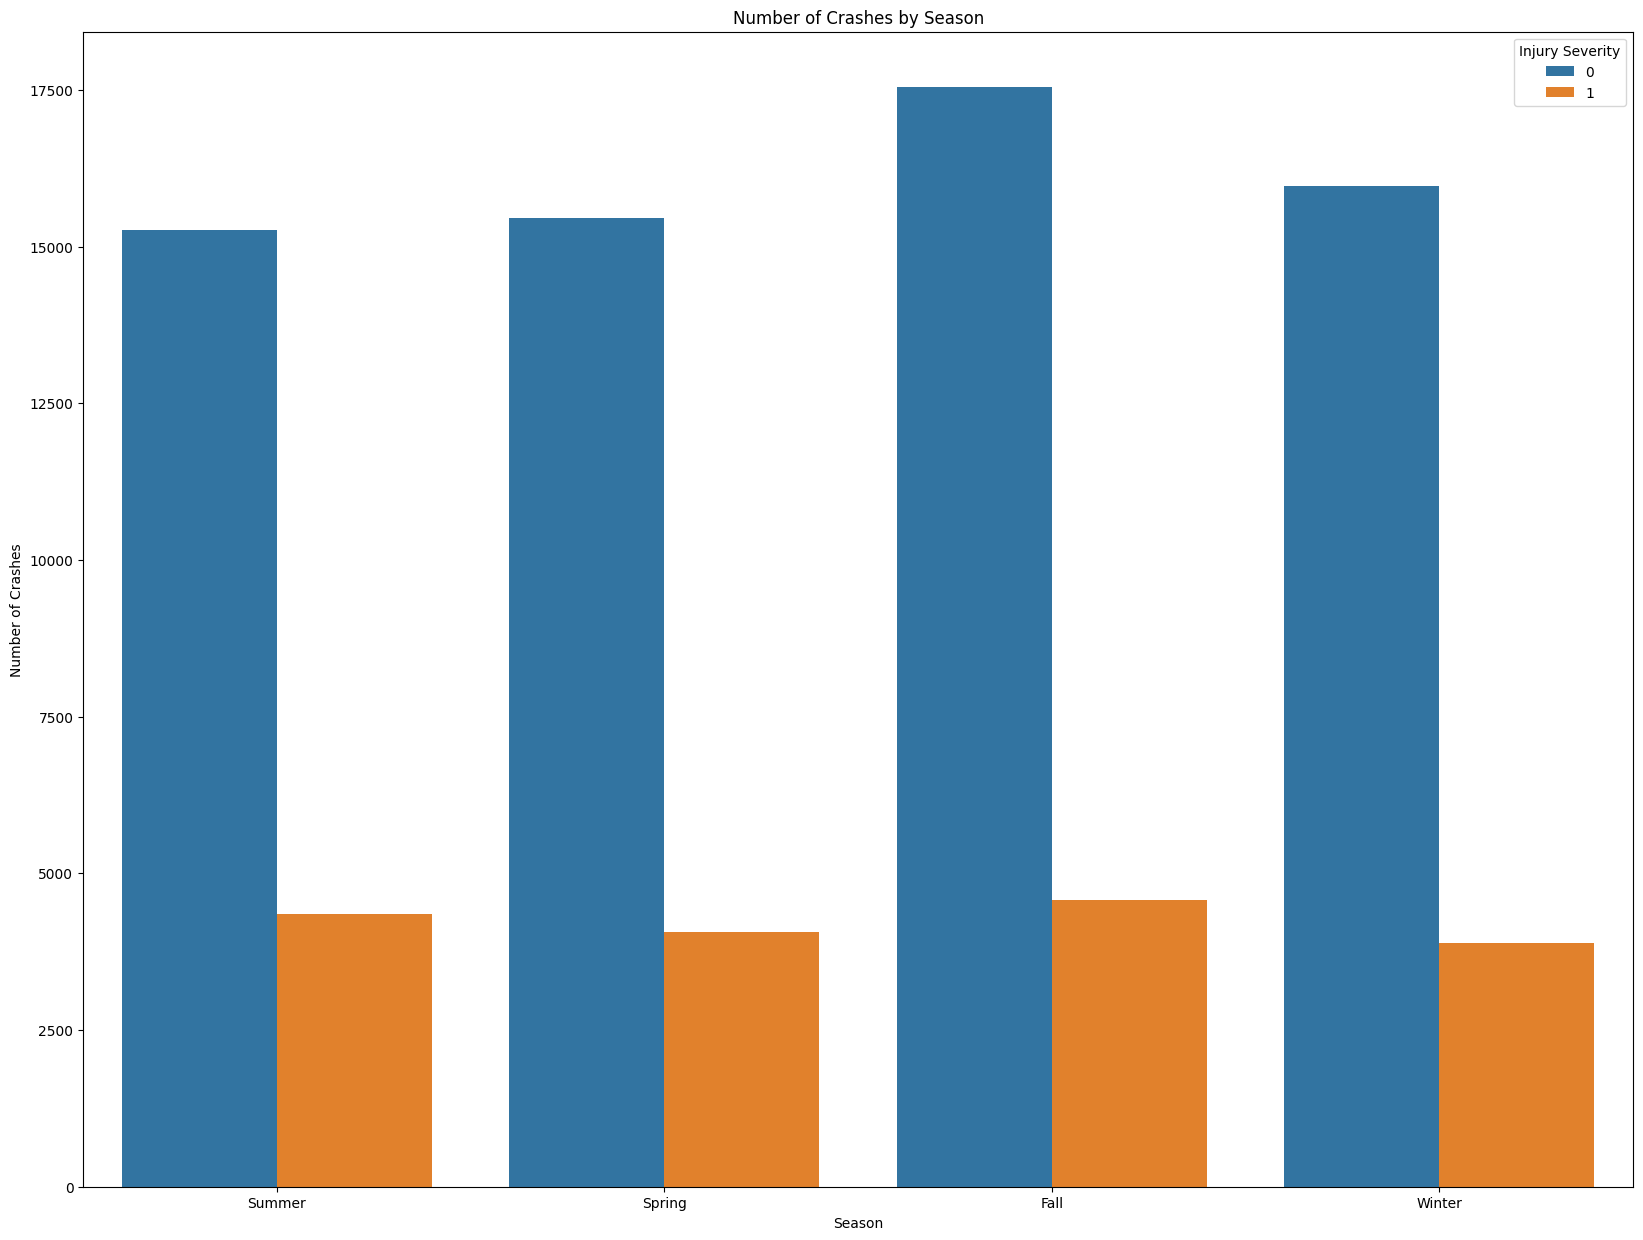

In [48]:
plt.figure(figsize=(20, 15))
sns.countplot(x=df2['Season'], hue=df2['Injury Severity'])
plt.title('Number of Crashes by Season')
plt.xlabel('Season')
plt.ylabel('Number of Crashes');

In [49]:
# Dummifying the categorical columns
cols_to_dummy=df2.select_dtypes(include='object').columns
df2=pd.get_dummies(df2,columns=cols_to_dummy,drop_first=True,dtype='int')

In [50]:
# Let us check the dimensioanlity of the data
df2.shape

(81123, 174)

In [51]:
X = df2.drop("Injury Severity", axis=1)
y = df2["Injury Severity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


## Model Selection
- We opted for two tree based algorithms because we have many observations in our dataset, and these algorithms perform well in this case
- We selected RandomForest and Extreme Gradient Descent algorithms (XGBoost)

In [52]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)
log_pred = logreg.predict(X_test)
print(classification_report(y_test, log_pred,target_names=['No Injury','Injury']))


              precision    recall  f1-score   support

   No Injury       0.89      0.61      0.72     12912
      Injury       0.31      0.70      0.43      3313

    accuracy                           0.63     16225
   macro avg       0.60      0.65      0.58     16225
weighted avg       0.77      0.63      0.66     16225



lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [53]:
# print coefficients and intercept for the top features in a dataframe
coef = pd.DataFrame(logreg.coef_.T, index=X_train.columns, columns=['coef'])
coef['abs_coef'] = coef.coef.abs()
coef = coef.sort_values('abs_coef', ascending=False)
coef.drop('abs_coef', axis=1, inplace=True)
coef.head(30)


,coef
Vehicle Damage Extent_SUPERFICIAL,-1.217651
Vehicle Damage Extent_FUNCTIONAL,-0.659919
Vehicle Second Impact Location_SIX OCLOCK,0.653636
Vehicle First Impact Location_SIX OCLOCK,0.644721
Collision Type_SAME DIRECTION SIDESWIPE,-0.639677
Collision Type_HEAD ON LEFT TURN,0.570317
Collision Type_SAME DIR REAR END,-0.529103
Vehicle Movement_MOVING CONSTANT SPEED,0.520165
Vehicle Damage Extent_NO DAMAGE,-0.457689
Collision Type_HEAD ON,0.455443


In [54]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced',max_depth=5)
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [55]:
importances = rf_model.feature_importances_

# Sorting and displaying feature importances
feature_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
print(feature_importances)


Vehicle Damage Extent_SUPERFICIAL              0.164314
Vehicle Damage Extent_DISABLING                0.133802
Collision Type_SAME DIRECTION SIDESWIPE        0.081716
Vehicle Damage Extent_FUNCTIONAL               0.069922
Vehicle First Impact Location_SIX OCLOCK       0.045703
                                                 ...   
Surface Condition_MUD, DIRT, GRAVEL            0.000000
Traffic Control_RAILWAY CROSSING DEVICE        0.000000
Vehicle Movement_PARKING                       0.000000
Vehicle Movement_DRIVERLESS MOVING VEH.        0.000000
Vehicle Body Type_ALL TERRAIN VEHICLE (ATV)    0.000000
Length: 173, dtype: float64


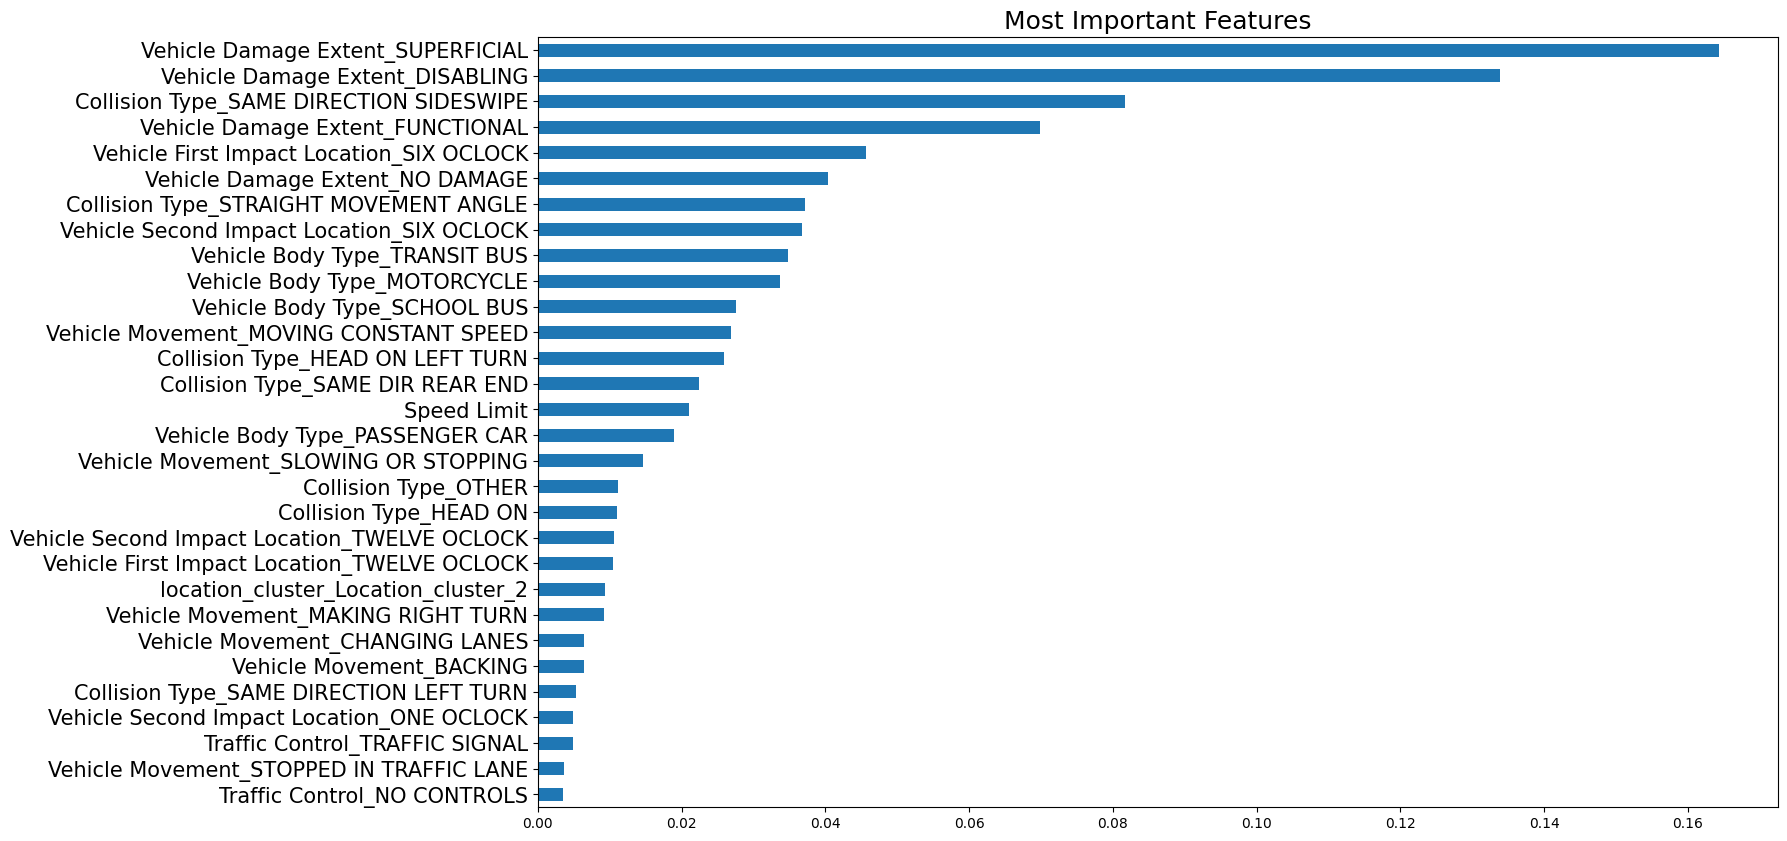

In [56]:
# Plotting the top features based on thier importance
(pd.Series(rf_model.feature_importances_, index=X.columns)
    .nlargest(30)  
    .plot(kind='barh', figsize=[16,10])
    .invert_yaxis()) 
plt.yticks(size=15)
plt.title('Most Important Features', size=18);

In [57]:
rfc_predictions=rf_model.predict(X_test)
print(classification_report(y_test,rfc_predictions,target_names=['No Injury','Injury']))

              precision    recall  f1-score   support

   No Injury       0.89      0.54      0.67     12912
      Injury       0.30      0.75      0.42      3313

    accuracy                           0.58     16225
   macro avg       0.60      0.65      0.55     16225
weighted avg       0.77      0.58      0.62     16225



In [58]:
# assigning weight to balance the dataset
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()



In [59]:
xgb_model = XGBClassifier(n_estimators=100, random_state=42, max_depth=5, scale_pos_weight=scale_pos_weight,tree_method='hist')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [60]:
xgb_predictions=xgb_model.predict(X_test)
print(classification_report(y_test,xgb_predictions,target_names=['No Injury','Injury']))    

              precision    recall  f1-score   support

   No Injury       0.90      0.63      0.74     12912
      Injury       0.33      0.72      0.46      3313

    accuracy                           0.65     16225
   macro avg       0.62      0.67      0.60     16225
weighted avg       0.78      0.65      0.68     16225



In [61]:

# Calculate metrics
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1 Score': f1_score,
    'ROC AUC': roc_auc_score
}

xgb_metrics = {metric_name: metric_func(y_test, xgb_predictions) for metric_name, metric_func in metrics.items()}
rfc_metrics = {metric_name: metric_func(y_test, rfc_predictions) for metric_name, metric_func in metrics.items()}
log_metrics = {metric_name: metric_func(y_test, log_pred) for metric_name, metric_func in metrics.items()}  # Added this

# Create dataframe
comparison_df = pd.DataFrame({
    'XGBoost': xgb_metrics,
    'Random Forest': rfc_metrics,
    'Logistic Regression': log_metrics  # Added this
})

comparison_df



,XGBoost,Random Forest,Logistic Regression
Accuracy,0.650169,0.582373,0.625455
Precision,0.333896,0.295258,0.313546
Recall,0.716873,0.753698,0.701479
F1 Score,0.455592,0.424299,0.433380
ROC AUC,0.674964,0.646056,0.653713


## Resampling Method to Improve Model Performance
- The model seems to be biased towards the positive class--that is, it is very sensitive to the positive class and correctly classifies it for the most part. However, it is also misclassifying many negative instances. While this may be beneficial in the sense that emergency units will be aptly dispatched to incidents that are most emergent, it may also lead to subobtimal allocations. 
- We  believe this problem is stemming from the weights we used to address class imbalance in the dataset. 
- To address this, we will try undersampling the negative class. This approach seems viable because we have a relatively large dataset; therefore, we can make do with losing some observations while also improving training speed and performance

In [62]:

df_minority = df2[df2['Injury Severity']==1]
df_majority = df2[df2['Injury Severity']==0]

df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority),     # to match minority class
                                   random_state=42) 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)
df_downsampled['Injury Severity'].value_counts()


Injury Severity
0    16893
1    16893
Name: count, dtype: int64

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


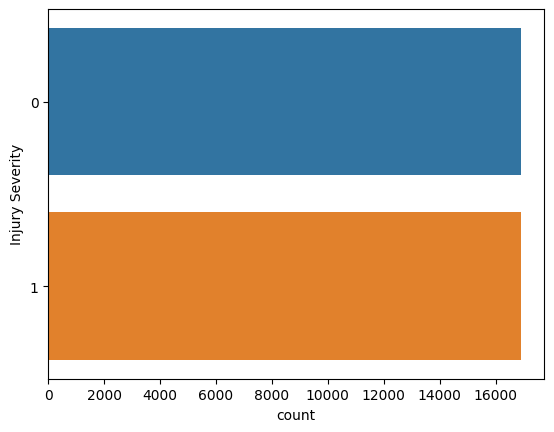

In [63]:
sns.countplot(y=df_downsampled['Injury Severity']);

In [64]:
X2 = df_downsampled.drop("Injury Severity", axis=1)
y2 = df_downsampled["Injury Severity"]
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X2, y2, test_size=0.20, random_state=42)

In [65]:
logreg_us = LogisticRegression(max_iter=10000)
logreg_us.fit(X_train_us, y_train_us)
log_pred_us = logreg_us.predict(X_test_us)
print(classification_report(y_test_us, log_pred_us,target_names=['No Injury','Injury']))


              precision    recall  f1-score   support

   No Injury       0.67      0.65      0.66      3384
      Injury       0.66      0.68      0.67      3374

    accuracy                           0.67      6758
   macro avg       0.67      0.67      0.67      6758
weighted avg       0.67      0.67      0.67      6758



In [66]:
coef = pd.DataFrame(logreg_us.coef_.T, index=X_train_us.columns, columns=['coef'])
coef['abs_coef'] = coef.coef.abs()
coef = coef.sort_values('abs_coef', ascending=False)
coef.drop('abs_coef', axis=1, inplace=True)
coef.head(40)


,coef
Vehicle Damage Extent_SUPERFICIAL,-2.374002
Vehicle Damage Extent_NO DAMAGE,-1.990926
Vehicle Damage Extent_FUNCTIONAL,-1.933831
Vehicle Body Type_MOTORCYCLE,1.469143
Collision Type_HEAD ON,1.179191
Vehicle Damage Extent_DISABLING,-1.070547
Collision Type_SAME DIRECTION SIDESWIPE,-0.817235
Vehicle Body Type_SCHOOL BUS,-0.816641
Vehicle Movement_BACKING,-0.784956
Vehicle Body Type_TRANSIT BUS,-0.749490


In [67]:
# Creating and training the Random Forest model on undersampled data
rf_model_us = RandomForestClassifier(n_estimators=450, random_state=42, max_depth=11)
rf_model_us.fit(X_train_us, y_train_us)

RandomForestClassifier(max_depth=11, n_estimators=450, random_state=42)

In [68]:
# Feature Importance
feature_importances_us = pd.Series(rf_model_us.feature_importances_, index=X_train_us.columns).sort_values(ascending=False)
print(feature_importances_us)

Vehicle Damage Extent_SUPERFICIAL           0.139136
Vehicle Damage Extent_DISABLING             0.074259
Vehicle Damage Extent_FUNCTIONAL            0.058831
Collision Type_SAME DIRECTION SIDESWIPE     0.048461
Vehicle First Impact Location_SIX OCLOCK    0.037609
                                              ...   
Equipment Problems_SIZE/TYPE IMPROPER       0.000003
Equipment Problems_STRAP/TETHER LOOSE       0.000003
Equipment Problems_FACING WRONG WAY         0.000001
Vehicle Body Type_FARM VEHICLE              0.000000
Traffic Control_SCHOOL ZONE SIGN DEVICE     0.000000
Length: 173, dtype: float64


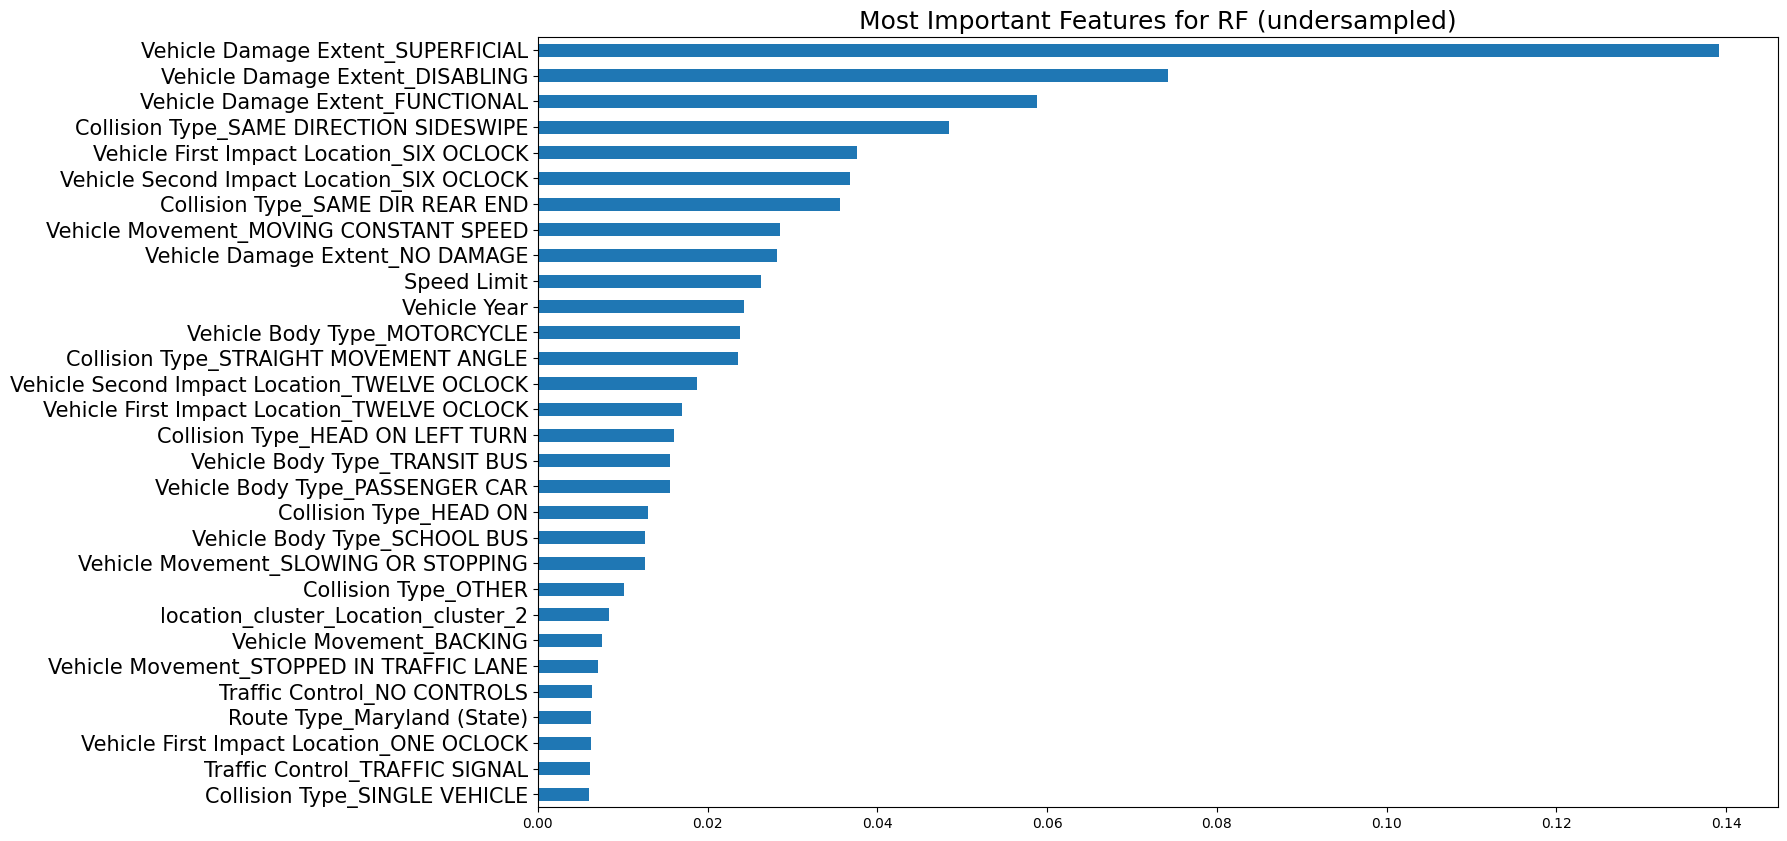

In [69]:
# Plot
feature_importances_us.nlargest(30).plot(kind='barh', figsize=[16,10]).invert_yaxis()
plt.yticks(size=15)
plt.title('Most Important Features for RF (undersampled)', size=18)
plt.show()

In [70]:
# Predictions
rfc_predictions_us = rf_model_us.predict(X_test_us)
print(classification_report(y_test_us, rfc_predictions_us,target_names=['No Injury', 'Injury']))

              precision    recall  f1-score   support

   No Injury       0.71      0.55      0.62      3384
      Injury       0.63      0.77      0.69      3374

    accuracy                           0.66      6758
   macro avg       0.67      0.66      0.66      6758
weighted avg       0.67      0.66      0.66      6758



In [71]:
# Creating and training the XGBoost model on undersampled data
xgb_model_us = XGBClassifier(n_estimators=200, random_state=42, max_depth=5,tree_method='hist',max_bin=800,alpha=0.3,learning_rate=0.15)
xgb_model_us.fit(X_train_us, y_train_us)

# Predictions
xgb_predictions_us = xgb_model_us.predict(X_test_us)
print(classification_report(y_test_us, xgb_predictions_us, target_names=['No Injury', 'Injury']))

              precision    recall  f1-score   support

   No Injury       0.70      0.62      0.65      3384
      Injury       0.66      0.73      0.69      3374

    accuracy                           0.67      6758
   macro avg       0.68      0.67      0.67      6758
weighted avg       0.68      0.67      0.67      6758



In [72]:
feature_importances_us = pd.DataFrame(xgb_model_us.feature_importances_, index=X_train_us.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances_us.head(50)

,importance
Vehicle First Impact Location_SIX OCLOCK,0.077855
Vehicle Damage Extent_SUPERFICIAL,0.072899
Vehicle Damage Extent_NO DAMAGE,0.060586
Vehicle Second Impact Location_SIX OCLOCK,0.056700
Vehicle Damage Extent_FUNCTIONAL,0.040048
Collision Type_SAME DIRECTION SIDESWIPE,0.039178
Vehicle Body Type_MOTORCYCLE,0.031091
Vehicle Damage Extent_DISABLING,0.023552
Vehicle Movement_BACKING,0.018639
Collision Type_SAME DIR REAR END,0.018533


In [73]:
# Removing features with zero importance
unused_features = list(feature_importances_us[feature_importances_us['importance'] == 0].index)
print(unused_features)

['Surface Condition_WATER(STANDING/MOVING)', 'Equipment Problems_NOT STREPPED RIGHT', 'Surface Condition_OIL', 'Modified Conditions_WET', 'Surface Condition_MUD, DIRT, GRAVEL', 'Equipment Problems_STRAP/TETHER LOOSE', 'Equipment Problems_SIZE/TYPE IMPROPER', 'Surface Condition_SAND', 'Equipment Problems_BELT(S) MISUSED', 'Equipment Problems_FACING WRONG WAY', 'Equipment Problems_BELTS/ANCHORS BROKE', 'Vehicle Movement_DRIVERLESS MOVING VEH.', 'Vehicle Body Type_ALL TERRAIN VEHICLE (ATV)', 'Vehicle Body Type_AUTOCYCLE', 'Vehicle Body Type_CROSS COUNTRY BUS', 'Vehicle Body Type_FARM VEHICLE', 'Vehicle Body Type_FIRE VEHICLE/NON EMERGENCY', 'Vehicle Body Type_LIMOUSINE', 'Vehicle Body Type_LOW SPEED VEHICLE', 'Route Type_Service Road', 'Vehicle Movement_RIGHT TURN ON RED', 'Traffic Control_SCHOOL ZONE SIGN DEVICE', 'Traffic Control_RAILWAY CROSSING DEVICE']


In [74]:
X_train_us.drop(unused_features, axis=1, inplace=True)
X_test_us.drop(unused_features, axis=1, inplace=True)

In [75]:
# same xgboost most without the features with zero importance
xgb_model_us_2 = XGBClassifier(n_estimators=200, random_state=42, max_depth=5, tree_method='hist', max_bin=800, alpha=0.3, learning_rate=0.15)
xgb_model_us_2.fit(X_train_us, y_train_us)
xgb_predictions_us_2 = xgb_model_us_2.predict(X_test_us)
print(classification_report(y_test_us, xgb_predictions_us_2, target_names=['No Injury', 'Injury']))

              precision    recall  f1-score   support

   No Injury       0.70      0.62      0.65      3384
      Injury       0.66      0.73      0.69      3374

    accuracy                           0.67      6758
   macro avg       0.68      0.67      0.67      6758
weighted avg       0.68      0.67      0.67      6758



In [76]:
feature_importances_us_2 = pd.DataFrame(xgb_model_us_2.feature_importances_, index=X_train_us.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances_us_2.head(30)

,importance
Vehicle First Impact Location_SIX OCLOCK,0.077855
Vehicle Damage Extent_SUPERFICIAL,0.072899
Vehicle Damage Extent_NO DAMAGE,0.060586
Vehicle Second Impact Location_SIX OCLOCK,0.056700
Vehicle Damage Extent_FUNCTIONAL,0.040048
Collision Type_SAME DIRECTION SIDESWIPE,0.039178
Vehicle Body Type_MOTORCYCLE,0.031091
Vehicle Damage Extent_DISABLING,0.023552
Vehicle Movement_BACKING,0.018639
Collision Type_SAME DIR REAR END,0.018533


In [77]:
# Metrics definition
metrics = {
    'Accuracy': accuracy_score,
    'Precision': lambda y_true, y_pred: precision_score(y_true, y_pred),
    'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred),
    'F1 Score': lambda y_true, y_pred: f1_score(y_true, y_pred),
}

# Metric Calculation Functions
def calculate_metrics(y_true, y_pred):
    return {metric_name: metric_func(y_true, y_pred) for metric_name, metric_func in metrics.items()}

# Calculate metrics
xgb_metrics = calculate_metrics(y_test, xgb_predictions)
rfc_metrics = calculate_metrics(y_test, rfc_predictions)
log_metrics = calculate_metrics(y_test, log_pred)
xgb_metrics_us = calculate_metrics(y_test_us, xgb_predictions_us)
rfc_metrics_us = calculate_metrics(y_test_us, rfc_predictions_us)
log_metrics_us = calculate_metrics(y_test_us, log_pred_us)

# Comparative Dataframe for organized presentation
comparison_df = pd.DataFrame({
    'XGBoost': xgb_metrics,
    'XGBoost (undersampled)': xgb_metrics_us,
    'Random Forest': rfc_metrics,
    'Random Forest (undersampled)': rfc_metrics_us,
    'Logistic Regression': log_metrics,
    'Logistic Regression (undersampled)': log_metrics_us
})

comparison_df



,XGBoost,XGBoost (undersampled),Random Forest,Random Forest (undersampled),Logistic Regression,Logistic Regression (undersampled)
Accuracy,0.650169,0.673572,0.582373,0.659959,0.625455,0.665138
Precision,0.333896,0.655237,0.295258,0.630266,0.313546,0.660133
Recall,0.716873,0.730587,0.753698,0.771488,0.701479,0.678720
F1 Score,0.455592,0.690863,0.424299,0.693763,0.433380,0.669297


In [78]:
# 
#df_majority_upsampled = resample(df_minority, 
                                 #replace=True,     # sample with replacement
                                # n_samples=len(df_majority),    # to match majority class
                                # random_state=42)
# Combine majority class with upsampled minority class
#df_upsampled = pd.concat([df_majority_upsampled, df_majority])
#df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)
#df_upsampled['Injury Severity'].value_counts()


X3 = df2.drop('Injury Severity', axis=1)
y3 = df2['Injury Severity']
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X3, y3, test_size=0.20, random_state=42)


df_train = pd.concat([X_train_os, y_train_os], axis=1)


df_majority = df_train[df_train['Injury Severity'] == 0]  
df_minority = df_train[df_train['Injury Severity'] == 1]  

# Upsample the minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=42)  


df_train_upsampled = pd.concat([df_majority, df_minority_upsampled])


df_train_upsampled = df_train_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)


X_train_os = df_train_upsampled.drop('Injury Severity', axis=1)
y_train_os = df_train_upsampled['Injury Severity']

df_train_upsampled['Injury Severity'].value_counts()




Injury Severity
0    51318
1    51318
Name: count, dtype: int64

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


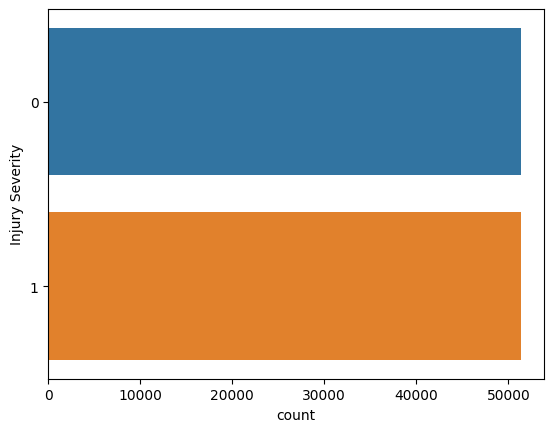

In [79]:
sns.countplot(y=df_train_upsampled['Injury Severity']);

In [80]:
#X3 = df_upsampled.drop("Injury Severity", axis=1)
#y3 = df_upsampled["Injury Severity"]
#X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X3, y3, test_size=0.33, random_state=42)


In [81]:
logreg_os = LogisticRegression(max_iter=10000)
logreg_os.fit(X_train_os, y_train_os)
log_pred_os = logreg_os.predict(X_test_os)
print(classification_report(y_test_os, log_pred_os,target_names=['No Injury','Injury']))


              precision    recall  f1-score   support

   No Injury       0.89      0.63      0.74     12912
      Injury       0.33      0.70      0.44      3313

    accuracy                           0.64     16225
   macro avg       0.61      0.66      0.59     16225
weighted avg       0.78      0.64      0.68     16225



In [82]:
coef = pd.DataFrame(logreg_os.coef_.T, index=X_train_os.columns, columns=['coef'])
coef['abs_coef'] = coef.coef.abs()
coef = coef.sort_values('abs_coef', ascending=False)
coef.drop('abs_coef', axis=1, inplace=True)
coef.head(30)   


,coef
Vehicle Damage Extent_SUPERFICIAL,-2.559778
Vehicle Damage Extent_NO DAMAGE,-2.316955
Vehicle Damage Extent_FUNCTIONAL,-2.042126
Vehicle Body Type_MOTORCYCLE,1.585210
Vehicle Damage Extent_DISABLING,-1.089330
Collision Type_HEAD ON,0.978897
Vehicle Body Type_SCHOOL BUS,-0.903043
Vehicle Movement_BACKING,-0.790173
Vehicle Body Type_TRANSIT BUS,-0.752471
Collision Type_SAME DIRECTION SIDESWIPE,-0.675620


In [83]:
rf_model_os = RandomForestClassifier(n_estimators=450, random_state=42, max_depth=11)
rf_model_os.fit(X_train_os, y_train_os)
rfc_predictions_os = rf_model_os.predict(X_test_os)
print(classification_report(y_test_os, rfc_predictions_os,target_names=['No Injury', 'Injury']))

              precision    recall  f1-score   support

   No Injury       0.91      0.57      0.70     12912
      Injury       0.31      0.77      0.45      3313

    accuracy                           0.61     16225
   macro avg       0.61      0.67      0.57     16225
weighted avg       0.79      0.61      0.65     16225



In [84]:
xgb_model_os = XGBClassifier(n_estimators=200, random_state=42, max_depth=5,tree_method='hist',max_bin=800,alpha=0.3,learning_rate=0.15)
xgb_model_os.fit(X_train_os, y_train_os)
xgb_predictions_os = xgb_model_os.predict(X_test_os)
print(classification_report(y_test_os, xgb_predictions_os,target_names=['No Injury', 'Injury']))

              precision    recall  f1-score   support

   No Injury       0.90      0.64      0.75     12912
      Injury       0.34      0.71      0.46      3313

    accuracy                           0.65     16225
   macro avg       0.62      0.67      0.60     16225
weighted avg       0.78      0.65      0.69     16225



In [85]:
# compare metrics of all nine models in a  dataframe
metrics = {
    'Accuracy': accuracy_score,
    'Precision': lambda y_true, y_pred: precision_score(y_true, y_pred),
    'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred),
    'F1 Score': lambda y_true, y_pred: f1_score(y_true, y_pred),
}

def calculate_metrics(y_true, y_pred):
    return {metric_name: metric_func(y_true, y_pred) for metric_name, metric_func in metrics.items()}
xgb_metrics = calculate_metrics(y_test, xgb_predictions)
rfc_metrics = calculate_metrics(y_test, rfc_predictions)
log_metrics = calculate_metrics(y_test, log_pred)
xgb_metrics_us = calculate_metrics(y_test_us, xgb_predictions_us)
rfc_metrics_us = calculate_metrics(y_test_us, rfc_predictions_us)
log_metrics_us = calculate_metrics(y_test_us, log_pred_us)
xgb_metrics_os = calculate_metrics(y_test_os, xgb_predictions_os)
rfc_metrics_os = calculate_metrics(y_test_os, rfc_predictions_os)
log_metrics_os = calculate_metrics(y_test_os, log_pred_os)

comparison_df = pd.DataFrame({
    'XGBoost': xgb_metrics,
    'XGBoost (undersampled)': xgb_metrics_us,
    'XGBoost (oversampled)': xgb_metrics_os,
    'Random Forest': rfc_metrics,
    'Random Forest (undersampled)': rfc_metrics_us,
    'Random Forest (oversampled)': rfc_metrics_os,
    'Logistic Regression': log_metrics,
    'Logistic Regression (undersampled)': log_metrics_us,
    'Logistic Regression (oversampled)': log_metrics_os
})

comparison_df

,XGBoost,XGBoost (undersampled),XGBoost (oversampled),Random Forest,Random Forest (undersampled),Random Forest (oversampled),Logistic Regression,Logistic Regression (undersampled),Logistic Regression (oversampled)
Accuracy,0.650169,0.673572,0.653436,0.582373,0.659959,0.608814,0.625455,0.665138,0.642958
Precision,0.333896,0.655237,0.335282,0.295258,0.630266,0.314275,0.313546,0.660133,0.325794
Recall,0.716873,0.730587,0.709629,0.753698,0.771488,0.774826,0.701479,0.678720,0.699970
F1 Score,0.455592,0.690863,0.455400,0.424299,0.693763,0.447174,0.433380,0.669297,0.444636


In [86]:
#print xgb feature importance
feature_importances = pd.DataFrame(xgb_model_os.feature_importances_, index = X_train_os.columns, columns=['importance']).sort_values('importance',ascending=False)
#pd.set_option('display.max_rows', None)
feature_importances

,importance
Vehicle First Impact Location_SIX OCLOCK,0.090250
Vehicle Damage Extent_NO DAMAGE,0.062323
Vehicle Damage Extent_SUPERFICIAL,0.060566
Vehicle Damage Extent_FUNCTIONAL,0.050523
Vehicle Second Impact Location_SIX OCLOCK,0.036747
...,...
Equipment Problems_NOT STREPPED RIGHT,0.000000
Equipment Problems_FACING WRONG WAY,0.000000
Equipment Problems_BELTS/ANCHORS BROKE,0.000000
"Surface Condition_MUD, DIRT, GRAVEL",0.000000


In [87]:

X4 = df2.drop('Injury Severity', axis=1)  # features
y4 = df2['Injury Severity']                # target variable


#smote = SMOTE(random_state=42)


#X_resampled, y_resampled = smote.fit_resample(X4, y4)

# Combine the resampled features and target into a new DataFrame
#df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
#df_resampled['Injury Severity'] = y_resampled

# Shuffle the DataFrame 
#df_resampled = df_resampled.sample(frac=1, random_state=42).reset_index(drop=True)


#df_resampled['Injury Severity'].value_counts()

X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X4, y4, test_size=0.20, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

X_train_sm_resampled, y_train_sm_resampled = smote.fit_resample(X_train_sm, y_train_sm)

df_train_resampled = pd.DataFrame(X_train_sm_resampled, columns=X_train_sm.columns)
df_train_resampled['Injury Severity'] = y_train_sm_resampled

df_train_resampled = df_train_resampled.sample(frac=1, random_state=42).reset_index(drop=True)

print(df_train_resampled['Injury Severity'].value_counts())
X_train_sm=df_train_resampled.drop('Injury Severity',axis=1)
y_train_sm=df_train_resampled['Injury Severity']



DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


Injury Severity
0    51318
1    51318
Name: count, dtype: int64


In [88]:
logreg_sm = LogisticRegression(max_iter=10000)
logreg_sm.fit(X_train_sm, y_train_sm)
log_pred_sm = logreg_sm.predict(X_test_sm)
print(classification_report(y_test_sm, log_pred_sm,target_names=['No Injury','Injury']))

              precision    recall  f1-score   support

   No Injury       0.83      0.88      0.85     12912
      Injury       0.38      0.28      0.32      3313

    accuracy                           0.76     16225
   macro avg       0.60      0.58      0.59     16225
weighted avg       0.73      0.76      0.74     16225



In [89]:
coef = pd.DataFrame(logreg_sm.coef_.T, index=X_train_sm.columns, columns=['coef'])
coef['abs_coef'] = coef.coef.abs()
coef = coef.sort_values('abs_coef', ascending=False)
coef.drop('abs_coef', axis=1, inplace=True)
coef.head(30)

,coef
Vehicle Damage Extent_NO DAMAGE,-4.820134
Vehicle Damage Extent_SUPERFICIAL,-2.939300
Vehicle Damage Extent_FUNCTIONAL,-2.467053
Collision Type_SAME DIRECTION SIDESWIPE,-2.277182
Collision Type_SAME DIRECTION LEFT TURN,-2.202494
Light_DUSK,-2.175869
Traffic Control_OTHER,-2.118683
Weather_CLOUDY,-2.113478
Light_DAWN,-2.100109
Collision Type_OTHER,-2.079268


In [90]:
rf_model_sm = RandomForestClassifier(n_estimators=500, random_state=42, max_depth=9)
rf_model_sm.fit(X_train_sm, y_train_sm)
rfc_predictions_sm = rf_model_sm.predict(X_test_sm)
print(classification_report(y_test_sm, rfc_predictions_sm,target_names=['No Injury', 'Injury']))

              precision    recall  f1-score   support

   No Injury       0.86      0.72      0.78     12912
      Injury       0.33      0.54      0.41      3313

    accuracy                           0.68     16225
   macro avg       0.59      0.63      0.60     16225
weighted avg       0.75      0.68      0.71     16225



In [91]:
xgb_model_sm = XGBClassifier(n_estimators=500, random_state=42, max_depth=9,tree_method='hist',max_bin=800,alpha=0.3,learning_rate=0.15)
xgb_model_sm.fit(X_train_sm, y_train_sm)
xgb_predictions_sm = xgb_model_sm.predict(X_test_sm)
print(classification_report(y_test_sm, xgb_predictions_sm,target_names=['No Injury', 'Injury']))

              precision    recall  f1-score   support

   No Injury       0.83      0.90      0.86     12912
      Injury       0.41      0.28      0.34      3313

    accuracy                           0.77     16225
   macro avg       0.62      0.59      0.60     16225
weighted avg       0.75      0.77      0.76     16225



In [92]:
xgb_feature_importances = pd.DataFrame(xgb_model_sm.feature_importances_, index = X_train_sm.columns, columns=['importance']).sort_values('importance',ascending=False)
xgb_feature_importances.head(30)

,importance
Vehicle Damage Extent_NO DAMAGE,0.150093
Vehicle Damage Extent_SUPERFICIAL,0.048820
Vehicle First Impact Location_SIX OCLOCK,0.025905
Vehicle Damage Extent_FUNCTIONAL,0.024152
Traffic Control_OTHER,0.018310
Light_DUSK,0.016968
Collision Type_SAME DIRECTION SIDESWIPE,0.016367
Vehicle Second Impact Location_FOUR OCLOCK,0.015688
Vehicle Second Impact Location_SIX OCLOCK,0.015302
Traffic Control_YIELD SIGN,0.014184


In [93]:
unused_features = xgb_feature_importances[xgb_feature_importances['importance'] == 0]
unused_features


,importance
Vehicle Movement_DRIVERLESS MOVING VEH.,0.0
Vehicle Body Type_LOW SPEED VEHICLE,0.0
Traffic Control_RAILWAY CROSSING DEVICE,0.0
Route Type_Service Road,0.0
Vehicle Body Type_FARM VEHICLE,0.0
Surface Condition_SAND,0.0
Vehicle Body Type_CROSS COUNTRY BUS,0.0
"Surface Condition_MUD, DIRT, GRAVEL",0.0
Equipment Problems_STRAP/TETHER LOOSE,0.0
Equipment Problems_SIZE/TYPE IMPROPER,0.0


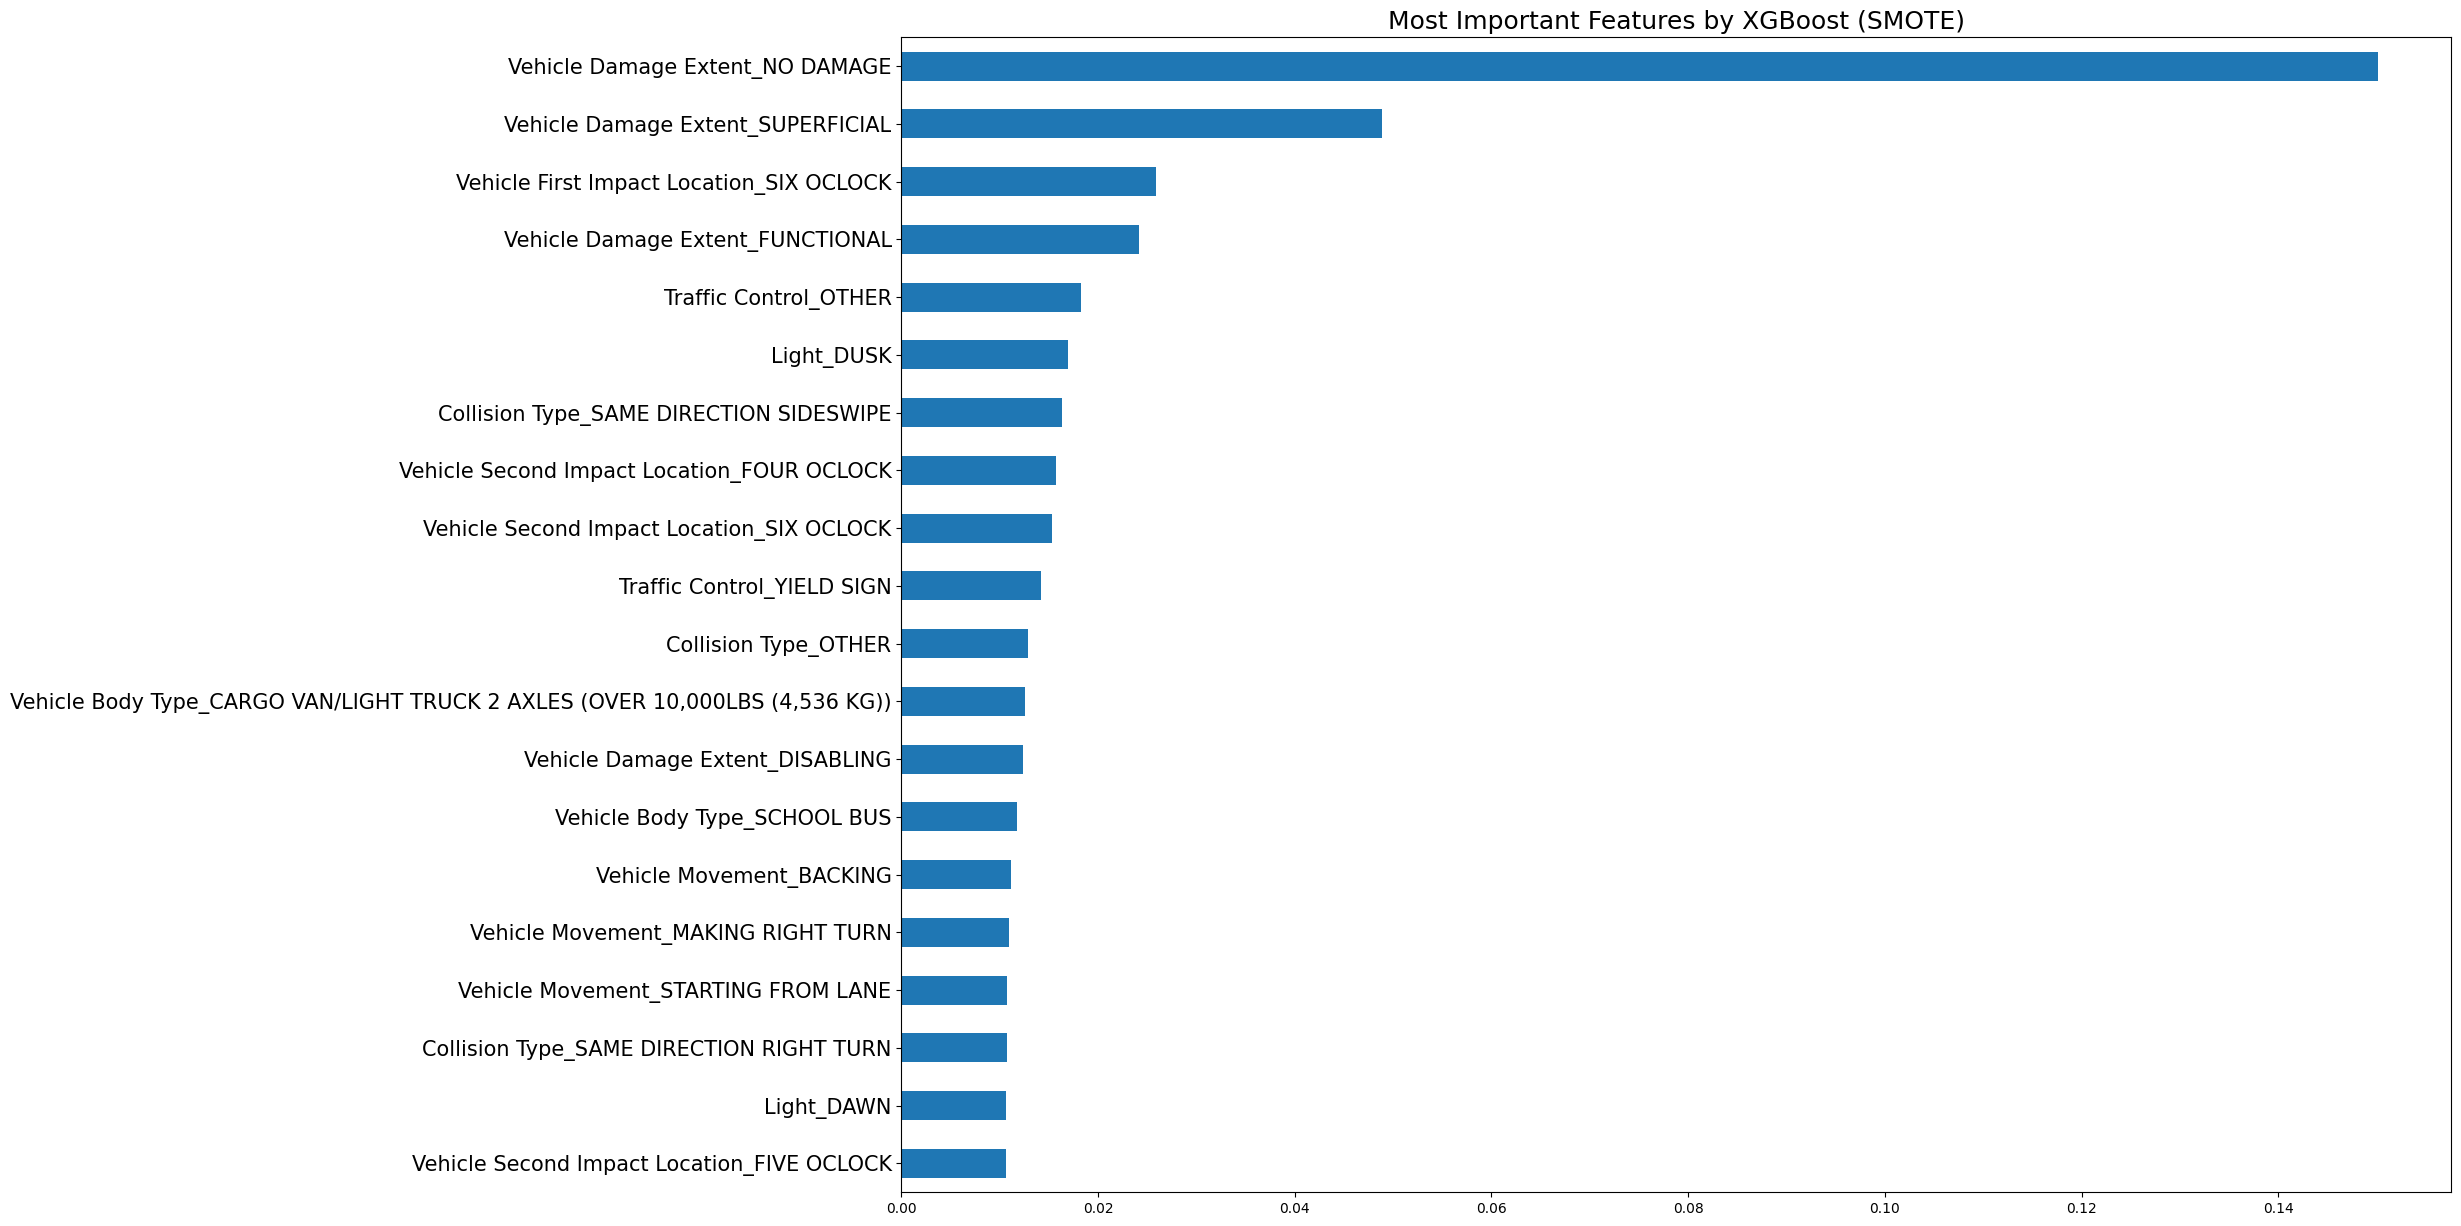

In [94]:
# Plotting the top features based on thier importance
(pd.Series(xgb_model_sm.feature_importances_, index=X.columns)
    .nlargest(20)  
    .plot(kind='barh', figsize=[20,15])
    .invert_yaxis()) 
plt.yticks(size=15)
plt.title('Most Important Features by XGBoost (SMOTE)', size=18);

In [95]:
metrics = {
    'Accuracy': accuracy_score,
    'Precision': lambda y_true, y_pred: precision_score(y_true, y_pred),
    'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred),
    'F1 Score': lambda y_true, y_pred: f1_score(y_true, y_pred),
}

def calculate_metrics(y_true, y_pred):
    return {metric_name: metric_func(y_true, y_pred) for metric_name, metric_func in metrics.items()}

xgb_metrics = calculate_metrics(y_test, xgb_predictions)
rfc_metrics = calculate_metrics(y_test, rfc_predictions)
log_metrics = calculate_metrics(y_test, log_pred)
xgb_metrics_us = calculate_metrics(y_test_us, xgb_predictions_us)
rfc_metrics_us = calculate_metrics(y_test_us, rfc_predictions_us)
log_metrics_us = calculate_metrics(y_test_us, log_pred_us)
xgb_metrics_os = calculate_metrics(y_test_os, xgb_predictions_os)
rfc_metrics_os = calculate_metrics(y_test_os, rfc_predictions_os)
log_metrics_os = calculate_metrics(y_test_os, log_pred_os)
xgb_metrics_sm = calculate_metrics(y_test_sm, xgb_predictions_sm)
rfc_metrics_sm = calculate_metrics(y_test_sm, rfc_predictions_sm)
log_metrics_sm = calculate_metrics(y_test_sm, log_pred_sm)

comparison_df = pd.DataFrame({
    'XGBoost': xgb_metrics,
    'XGBoost (undersampled)': xgb_metrics_us,
    'XGBoost (oversampled)': xgb_metrics_os,
    'XGBoost (SMOTE)': xgb_metrics_sm,
    'Random Forest': rfc_metrics,
    'Random Forest (undersampled)': rfc_metrics_us,
    'Random Forest (oversampled)': rfc_metrics_os,
    'Random Forest (SMOTE)': rfc_metrics_sm,
    'Logistic Regression': log_metrics,
    'Logistic Regression (undersampled)': log_metrics_us,
    'Logistic Regression (oversampled)': log_metrics_os,
    'Logistic Regression (SMOTE)': log_metrics_sm
})

comparison_df

,XGBoost,XGBoost (undersampled),XGBoost (oversampled),XGBoost (SMOTE),Random Forest,Random Forest (undersampled),Random Forest (oversampled),Random Forest (SMOTE),Logistic Regression,Logistic Regression (undersampled),Logistic Regression (oversampled),Logistic Regression (SMOTE)
Accuracy,0.650169,0.673572,0.653436,0.771834,0.582373,0.659959,0.608814,0.682773,0.625455,0.665138,0.642958,0.757843
Precision,0.333896,0.655237,0.335282,0.414505,0.295258,0.630266,0.314275,0.329554,0.313546,0.660133,0.325794,0.375706
Recall,0.716873,0.730587,0.709629,0.284636,0.753698,0.771488,0.774826,0.535165,0.701479,0.678720,0.699970,0.281014
F1 Score,0.455592,0.690863,0.455400,0.337509,0.424299,0.693763,0.447174,0.407914,0.433380,0.669297,0.444636,0.321533


In [96]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)
xgb_parameters = {
    'n_estimators': stats.randint(100, 1000),
    'max_depth': stats.randint(1, 11),
    'learning_rate': stats.uniform(0.01, 0.99),
    'max_bin' : stats.randint(100,1000),
    'alpha': stats.uniform(0.0, 100.0),
    'min_child_weight': stats.uniform(0, 10),
    'colsample_bytree': stats.uniform(0.5, 0.5),
    'gamma': stats.uniform(0, 10),
    'subsample': stats.uniform(0.5, 0.5)
}

xgbr = XGBClassifier(random_state=42,tree_method='hist')
xgb_grid_search = RandomizedSearchCV(xgbr, xgb_parameters, cv=kf, scoring='f1', n_jobs=-1, verbose=1)
xgb_grid_search.fit(X_train_us, y_train_us)

# Best RF Model
best_xgb = xgb_grid_search.best_estimator_

# RF predictions
xgb_preds = best_xgb.predict(X_test_us)
best_params = xgb_grid_search.best_params_

print(classification_report(y_test_us, xgb_preds))
print(f'Best parameters: {xgb_grid_search.best_params_}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
              precision    recall  f1-score   support

           0       0.70      0.58      0.64      3384
           1       0.64      0.75      0.69      3374

    accuracy                           0.67      6758
   macro avg       0.67      0.67      0.66      6758
weighted avg       0.67      0.67      0.66      6758

Best parameters: {'alpha': 18.027035052150463, 'colsample_bytree': 0.9270213551269942, 'gamma': 7.098960884082166, 'learning_rate': 0.21498063773949883, 'max_bin': 474, 'max_depth': 5, 'min_child_weight': 3.387234454820037, 'n_estimators': 171, 'subsample': 0.8336026862498261}


In [97]:
print(f'Best score: {xgb_grid_search.best_score_}')

Best score: 0.7029164998864224


In [98]:
# applying threshold moving to the best model, which is XGBoost Undersampled
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits,random_state=42,shuffle=True)

# Placeholder for the best threshold
best_thresholds = []
best_f1_scores = []
X2.drop(unused_features.index, axis=1, inplace=True)
# Selecting top 10 features

# Loop over each fold
for train_index, test_index in skf.split(X2, y2):
    X_train_th, X_test_th = X2.iloc[train_index], X2.iloc[test_index]
    y_train_th, y_test_th = y2.iloc[train_index], y2.iloc[test_index]

    # Train the model
    xgb_model = XGBClassifier(**best_params)
    xgb_model.fit(X_train_th, y_train_th)

    # Predict probabilities
    xgb_prob = xgb_model.predict_proba(X_test_th)[:, 1]

    # Find the best threshold for this fold
    best_f1 = 0
    best_threshold = 0.5
    thresholds = np.linspace(0, 1, 101)
    for th in thresholds:
        preds = (xgb_prob >= th).astype(int)
        f1 = f1_score(y_test_th, preds)  # Corrected to use y_test_th
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = th

    best_thresholds.append(best_threshold)
    best_f1_scores.append(best_f1)

# Calculate the average best threshold
final_best_threshold = np.mean(best_thresholds)
final_best_f1 = np.mean(best_f1_scores)

print(f'Average Best Threshold: {final_best_threshold}')
print(f'Average Best F1 Score: {final_best_f1}')

# Retrain the model on the entire dataset
xgb_model_final = XGBClassifier(**best_params)
xgb_model_final.fit(X2, y2)

# Final prediction 
xgb_prob_final = xgb_model_final.predict_proba(X2)[:, 1]
xgb_final_predictions = (xgb_prob_final >= final_best_threshold).astype(int)

# Final evaluation report
print('------------------------------------------------------------')
print(f'Final Model Performance with Threshold of {final_best_threshold}')
print(classification_report(y2, xgb_final_predictions, target_names=['No Injury', 'Injury']))


Average Best Threshold: 0.382
Average Best F1 Score: 0.7201115921857997
------------------------------------------------------------
Final Model Performance with Threshold of 0.382
              precision    recall  f1-score   support

   No Injury       0.81      0.40      0.53     16893
      Injury       0.60      0.91      0.72     16893

    accuracy                           0.65     33786
   macro avg       0.70      0.65      0.63     33786
weighted avg       0.70      0.65      0.63     33786



In [99]:
metrics = { 
    'Accuracy': accuracy_score,
    'Precision': lambda y_true, y_pred: precision_score(y_true, y_pred),
    'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred),
    'F1 Score': lambda y_true, y_pred: f1_score(y_true, y_pred),
}

def calculate_metrics(y_true, y_pred):
    return {metric_name: metric_func(y_true, y_pred) for metric_name, metric_func in metrics.items()}

xgb_metrics = calculate_metrics(y_test, xgb_predictions)
rfc_metrics = calculate_metrics(y_test, rfc_predictions)    
log_metrics = calculate_metrics(y_test, log_pred)
xgb_metrics_us = calculate_metrics(y_test_us, xgb_predictions_us)
rfc_metrics_us = calculate_metrics(y_test_us, rfc_predictions_us)
log_metrics_us = calculate_metrics(y_test_us, log_pred_us)
xgb_metrics_os = calculate_metrics(y_test_os, xgb_predictions_os)
rfc_metrics_os = calculate_metrics(y_test_os, rfc_predictions_os)
log_metrics_os = calculate_metrics(y_test_os, log_pred_os)
xgb_metrics_sm = calculate_metrics(y_test_sm, xgb_predictions_sm)
rfc_metrics_sm = calculate_metrics(y_test_sm, rfc_predictions_sm)
log_metrics_sm = calculate_metrics(y_test_sm, log_pred_sm)
xgb_metrics_final = calculate_metrics(y2, xgb_final_predictions)

comparison_df = pd.DataFrame({
    'XGBoost': xgb_metrics,
    'XGBoost (undersampled)': xgb_metrics_us,
    'XGBoost (oversampled)': xgb_metrics_os,
    'XGBoost (SMOTE)': xgb_metrics_sm,
    'XGBoost (0.38 Threshold )': xgb_metrics_final,
    'Random Forest': rfc_metrics,
    'Random Forest (undersampled)': rfc_metrics_us,
    'Random Forest (oversampled)': rfc_metrics_os,
    'Random Forest (SMOTE)': rfc_metrics_sm,
    'Logistic Regression': log_metrics,
    'Logistic Regression (undersampled)': log_metrics_us,
    'Logistic Regression (oversampled)': log_metrics_os,
    'Logistic Regression (SMOTE)': log_metrics_sm
})

comparison_df

,XGBoost,XGBoost (undersampled),XGBoost (oversampled),XGBoost (SMOTE),XGBoost (0.38 Threshold ),Random Forest,Random Forest (undersampled),Random Forest (oversampled),Random Forest (SMOTE),Logistic Regression,Logistic Regression (undersampled),Logistic Regression (oversampled),Logistic Regression (SMOTE)
Accuracy,0.650169,0.673572,0.653436,0.771834,0.652193,0.582373,0.659959,0.608814,0.682773,0.625455,0.665138,0.642958,0.757843
Precision,0.333896,0.655237,0.335282,0.414505,0.601061,0.295258,0.630266,0.314275,0.329554,0.313546,0.660133,0.325794,0.375706
Recall,0.716873,0.730587,0.709629,0.284636,0.905168,0.753698,0.771488,0.774826,0.535165,0.701479,0.678720,0.699970,0.281014
F1 Score,0.455592,0.690863,0.455400,0.337509,0.722415,0.424299,0.693763,0.447174,0.407914,0.433380,0.669297,0.444636,0.321533


## Final Model
The best model is the XGBoost model with the undersampled data using the following hyperparamenters obtained through a randomized grid search:
- alpha': 0.9089896374720685
-  'colsample_bytree': 0.6636960107039301
- 'gamma': 0.5171661648087356
- 'learning_rate': 0.10453669493855258
- 'max_bin': 762
- 'max_depth': 2
- 'min_child_weight': 2.7948742521264034
- 'n_estimators': 198
- 'subsample': 0.8593135239749632

### Optimizing for parsimony and performance
- The top 20 features seem to produce the same performance as having higher dimensionality

In [100]:
# try to reduce number of features to increase parsimony
top_features = list(feature_importances.head(20).index)
X5 = X2[top_features]

# applying threshold moving to the best model, which is XGBoost Undersampled
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, random_state=42, shuffle=True)

# Placeholder for the best threshold
best_thresholds = []
best_f1_scores = []

# Loop over each fold using the dataset with top features
for train_index, test_index in skf.split(X5, y2):
    X_train_th, X_test_th = X5.iloc[train_index], X5.iloc[test_index]
    y_train_th, y_test_th = y2.iloc[train_index], y2.iloc[test_index]

    # Train the model with best parameters on the reduced feature set
    xgb_model = XGBClassifier(**best_params)
    xgb_model.fit(X_train_th, y_train_th)

    # Predict probabilities on the test set
    xgb_prob = xgb_model.predict_proba(X_test_th)[:, 1]

    # Find the best threshold for this fold
    best_f1 = 0
    best_threshold = 0.5
    thresholds = np.linspace(0, 1, 101)
    for th in thresholds:
        preds = (xgb_prob >= th).astype(int)
        f1 = f1_score(y_test_th, preds)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = th

    best_thresholds.append(best_threshold)
    best_f1_scores.append(best_f1)

# Calculate the average best threshold
final_best_threshold = np.mean(best_thresholds)
final_best_f1 = np.mean(best_f1_scores)

print(f'Average Best Threshold: {final_best_threshold}')
print(f'Average Best F1 Score: {final_best_f1}')

# Retrain the model on the entire dataset with reduced features
xgb_model_final = XGBClassifier(**best_params)
xgb_model_final.fit(X5, y2)

# Final prediction using the model trained on reduced features
xgb_prob_final = xgb_model_final.predict_proba(X5)[:, 1]
xgb_final_predictions = (xgb_prob_final >= final_best_threshold).astype(int)

# Final evaluation report
print('------------------------------------------------------------')
print(f'Final Model Performance with Threshold of {final_best_threshold}')
print(classification_report(y2, xgb_final_predictions, target_names=['No Injury', 'Injury']))


Average Best Threshold: 0.378
Average Best F1 Score: 0.7193567283477572
------------------------------------------------------------
Final Model Performance with Threshold of 0.378
              precision    recall  f1-score   support

   No Injury       0.81      0.38      0.52     16893
      Injury       0.60      0.91      0.72     16893

    accuracy                           0.65     33786
   macro avg       0.70      0.65      0.62     33786
weighted avg       0.70      0.65      0.62     33786



## Interpreting the Model
- Tools like LIME and SHAP enhances model's Interpretability. Allows us to see how the model is making its predictions.
- Recall that the optimal decision threshold is 0.38. Probability of injury over 0.38 should be claissified as Emergent

[21:31:56] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
 98%|===================| 33271/33786 [00:21<00:00]        

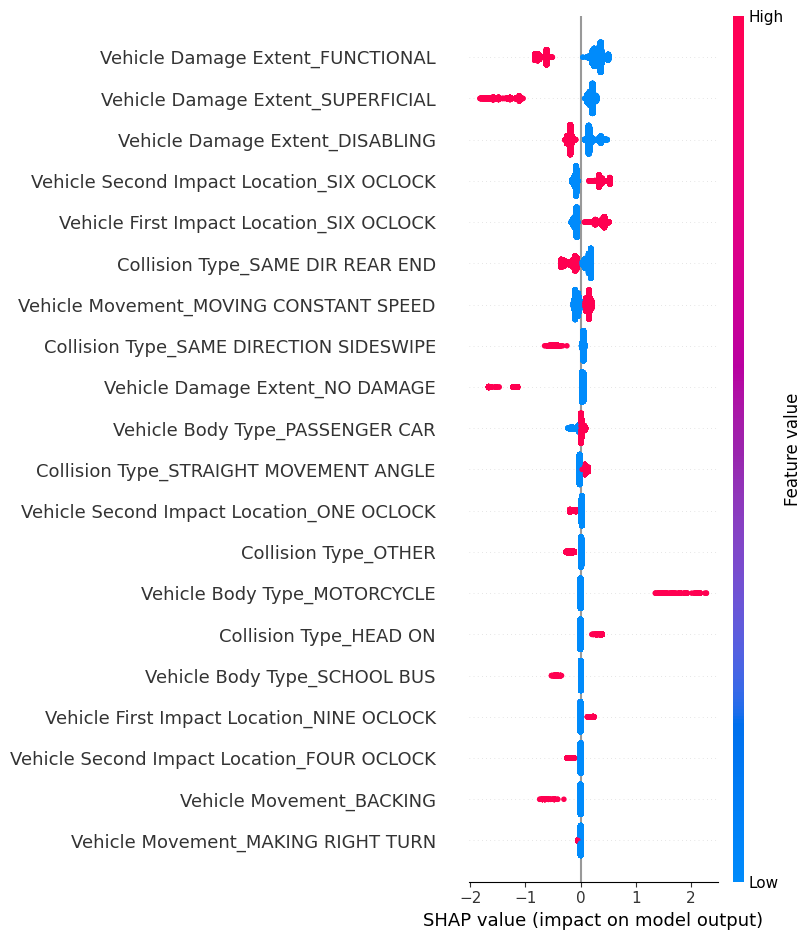

In [101]:
explainer = shap.Explainer(xgb_model_final, X5,output_names=['Non-Emergent', 'Emergent'],seed=42)
shap_values = explainer.shap_values(X5)
# Summary plot
shap.summary_plot(shap_values, X5)


In [102]:
#save final model
import pickle

pickle.dump(xgb_model_final, open('xgb_model_final2.pkl', 'wb'))